

Group A: Anais, Andreea y Mar

Countries assigned:
        Argentina, Russia, Colombia, Chile and Spain


Option C

DONE: 1. Document all steps. Structure your code to keep it cleaned using good practices.

DONE: 2. Collect Coronavirus Data. It is mandatory that in each call, it collects the last updated data.

DONE: 3. Determine and explain if the data is cleaned. If not, then clean it.

DOING: 4. Create an API that returns a Json with the logic explained for your group. The flask server must be executed running the src/api/server.py file.
5. Get the jsons generated from your annexed group and plot it. First, try to connect to the private ip of your annexed group. If it is not possible because of physical issues, then simply use what they generate copying it. If your annexed group cannot give you the necessary json, then annotate it, use the json of another group.

DONE: 6. Show different tendencies for each column in your dataset. Show, vertically, the start date and end date of the alarm state in each plot. If there is no alarm state, then show only the start date.

DONE: 7. Draw the workflow of your program. You can use free tools.

DONE: 8. Per country, which are the columns that are more related find the correlation between columns with the correlation matrix.

DONE: 9. Use a different github repository adding all group participants with write permissions. Use that repository to manage the delivery code and resources. It is mandatory that every student of the group does, at least,five commits/push.

DONE: 10. Answer the questions:
        a. What position do your countries occupe respect to the number of total infected, total deaths and total recoveries?
        b. What can you conclude about your data study?
        c. Are there outliers or some rare data?

DOING:

Our API must offer data to Group B and receive it from Group F, as follows:

    We have to offer a json(df):
    - Group A: it must return a json with one key “n_c_averages” that represents
    the mean of the “new_cases” per day of all of your countries.


    We should receive a json(df):
    - Group F: it must return a json with one key “n_t_averages” that represents the
    mean of the “new_tests” per day of all your countries.
    
Option B:
DOING:
1. Draw, in different colors and vertically, the moments when the daily death curve increases and decreases.
2. Create with bars, lines, points and pie charts the daily deaths and infected.
3. Research to save each plot in local files. Save them on different folders for each country.
4. When are the worst moments to go to the countries? Answer this referring to the “per_million” columns.


In [1]:
#importamos librerias y funciones
import pandas as pd
import seaborn as sns
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from utils.folders_tb import jsonlink_df
from utils.mining_data_tb import filter_df, df_covid, datetime, data_complete_clean, data_paises_clean, group, sort_columns
from utils.visualization_tb import heatmap_df, detect_outliers_df, plot_clean_columns,remove_outlier,boxplots_per_country,heatmap_with_column_filters,position_countries,columns_correlation_pivot, heatmap_per_country


Option C
2. Collect Coronavirus Data. It is mandatory that in each call, it collects the last updated data. 
DONE: All our data is collected through json url's from the provided link.

In [2]:
#Dataset total limpio 
covid_complete= data_complete_clean()
covid_complete

location  population  life_expectancy  data.date  data.total_cases  \
0      Afghanistan  38928341.0            64.83 2020-02-24               1.0   
1      Afghanistan  38928341.0            64.83 2020-02-25               1.0   
2      Afghanistan  38928341.0            64.83 2020-02-26               1.0   
3      Afghanistan  38928341.0            64.83 2020-02-27               1.0   
4      Afghanistan  38928341.0            64.83 2020-02-28               1.0   
...            ...         ...              ...        ...               ...   
61498     Zimbabwe  14862927.0            61.49 2021-01-19           28675.0   
61499     Zimbabwe  14862927.0            61.49 2021-01-20           29408.0   
61500     Zimbabwe  14862927.0            61.49 2021-01-21           30047.0   
61501     Zimbabwe  14862927.0            61.49 2021-01-22           30523.0   
61502     Zimbabwe  14862927.0            61.49 2021-01-23           31007.0   

       data.new_cases  data.total_cases_per_million  \
0                 1.0                         0.026   
1                 0.0                         0.026   
2                 0.0                         0.026   
3                 0.0                         0.026   
4                 0.0                         0.026   
...               ...                           ...   
61498           783.0                      1929.297   
61499           733.0                      1978.614   
61500           639.0                      2021.607   
61501           476.0                      2053.633   
61502           484.0                      2086.197   

       data.new_cases_per_million  data.stringency_index  \
0                           0.026                   8.33   
1                           0.000                   8.33   
2                           0.000                   8.33   
3                           0.000                   8.33   
4                           0.000                   8.33   
...                           ...                    ...   
61498                      52.681                    NaN   
61499                      49.317                    NaN   
61500                      42.993                    NaN   
61501                      32.026                    NaN   
61502                      32.564                    NaN   

       data.new_cases_smoothed  ...  data.reproduction_rate  data.total_tests  \
0                          NaN  ...                     NaN               NaN   
1                          NaN  ...                     NaN               NaN   
2                          NaN  ...                     NaN               NaN   
3                          NaN  ...                     NaN               NaN   
4                          NaN  ...                     NaN               NaN   
...                        ...  ...                     ...               ...   
61498                  776.571  ...                     NaN          280636.0   
61499                  736.000  ...                     NaN          285054.0   
61500                  668.429  ...                     NaN               NaN   
61501                  630.571  ...                     NaN               NaN   
61502                  589.429  ...                     NaN               NaN   

       data.total_tests_per_thousand  data.tests_units  \
0                                NaN               NaN   
1                                NaN               NaN   
2                                NaN               NaN   
3                                NaN               NaN   
4                                NaN               NaN   
...                              ...               ...   
61498                         18.882   tests performed   
61499                         19.179   tests performed   
61500                            NaN               NaN   
61501                            NaN               NaN   
61502                            NaN               NaN  

In [3]:
#Dataset limpio filtrado por nuestros paises
covid_paises= data_paises_clean()
covid_paises

location  population  life_expectancy  data.date  data.total_tests  \
0     Argentina  45195777.0            76.67 2020-01-01               4.0   
1     Argentina  45195777.0            76.67 2020-01-02              25.0   
2     Argentina  45195777.0            76.67 2020-01-03              30.0   
3     Argentina  45195777.0            76.67 2020-01-04              43.0   
4     Argentina  45195777.0            76.67 2020-01-05              53.0   
...         ...         ...              ...        ...               ...   
1761      Spain  46754783.0            83.56 2021-01-19               NaN   
1762      Spain  46754783.0            83.56 2021-01-20               NaN   
1763      Spain  46754783.0            83.56 2021-01-21               NaN   
1764      Spain  46754783.0            83.56 2021-01-22               NaN   
1765      Spain  46754783.0            83.56 2021-01-23               NaN   

      data.new_tests  data.total_tests_per_thousand  \
0                4.0                          0.000   
1               21.0                          0.001   
2                5.0                          0.001   
3               13.0                          0.001   
4               10.0                          0.001   
...              ...                            ...   
1761             NaN                            NaN   
1762             NaN                            NaN   
1763             NaN                            NaN   
1764             NaN                            NaN   
1765             NaN                            NaN   

      data.new_tests_per_thousand data.tests_units  data.stringency_index  \
0                             0.0    people tested                    0.0   
1                             0.0    people tested                    0.0   
2                             0.0    people tested                    0.0   
3                             0.0    people tested                    0.0   
4                             0.0    people tested                    0.0   
...                           ...              ...                    ...   
1761                          NaN              NaN                   71.3   
1762                          NaN              NaN                   71.3   
1763                          NaN              NaN                    NaN   
1764                          NaN              NaN                    NaN   
1765                          NaN              NaN                    NaN   

      ...  data.total_deaths  data.new_deaths  data.new_deaths_smoothed  \
0     ...                NaN              NaN                       NaN   
1     ...                NaN              NaN                       NaN   
2     ...                NaN              NaN                       NaN   
3     ...                NaN              NaN                       NaN   
4     ...                NaN              NaN                       NaN   
...   ...                ...              ...                       ...   
1761  ...            54173.0            404.0                   212.857   
1762  ...            54637.0            464.0                   251.286   
1763  ...            55041.0            404.0                   280.286   
1764  ...            55441.0            400.0                   303.857   
1765  ...            55441.0              0.0                   303.857   

      data.new_cases_smoothed_per_million  data.total_deaths_per_million  \
0                                     NaN                            NaN   
1                                     NaN                            NaN   
2                                     NaN                            NaN   
3                                     NaN                            NaN   
4                                     NaN                            NaN   
...                                   ...                            ...   
1761                              713.516                      

In [4]:
#Importamos el dataset actualizado
covid = jsonlink_df('https://covid.ourworldindata.org/data/owid-covid-data.json').T
covid

continent     location   population population_density median_age  \
AFG           Asia  Afghanistan  3.89283e+07             54.422       18.6   
ALB         Europe      Albania   2.8778e+06            104.871         38   
DZA         Africa      Algeria   4.3851e+07             17.348       29.1   
AND         Europe      Andorra        77265            163.755        NaN   
AGO         Africa       Angola  3.28663e+07              23.89       16.8   
...            ...          ...          ...                ...        ...   
VNM           Asia      Vietnam  9.73386e+07            308.127       32.6   
OWID_WRL       NaN        World   7.7948e+09             58.045       30.9   
YEM           Asia        Yemen   2.9826e+07             53.508       20.3   
ZMB         Africa       Zambia   1.8384e+07             22.995       17.7   
ZWE         Africa     Zimbabwe  1.48629e+07             42.729       19.6   

         aged_65_older aged_70_older gdp_per_capita cardiovasc_death_rate  \
AFG              2.581         1.337        1803.99               597.029   
ALB             13.188         8.643        11803.4               304.195   
DZA              6.211         3.857        13913.8               278.364   
AND                NaN           NaN            NaN               109.135   
AGO              2.405         1.362        5819.49               276.045   
...                ...           ...            ...                   ...   
VNM               7.15         4.718        6171.88               245.465   
OWID_WRL         8.696         5.355        15469.2                233.07   
YEM              2.922         1.583        1479.15               495.003   
ZMB               2.48         1.542        3689.25               234.499   
ZWE              2.822         1.882        1899.78               307.846   

         diabetes_prevalence handwashing_facilities  \
AFG                     9.59                 37.746   
ALB                    10.08                    NaN   
DZA                     6.73                 83.741   
AND                     7.97                    NaN   
AGO                     3.94                 26.664   
...                      ...                    ...   
VNM                        6                 85.847   
OWID_WRL                8.51                  60.13   
YEM                     5.35                 49.542   
ZMB                     3.94                 13.938   
ZWE                     1.82                 36.791   

         hospital_beds_per_thousand life_expectancy human_development_index  \
AFG                             0.5           64.83                   0.498   
ALB                            2.89           78.57                   0.785   
DZA                             1.9           76.88                   0.754   
AND                             NaN           83.73                   0.858   
AGO                             NaN           61.15                   0.581   
...                             ...             ...                     ...   
VNM                             2.6            75.4                   0.694   
OWID_WRL                      2.705           72.58                     NaN   
YEM                             0.7           66.12                   0.452   
ZMB                               2           63.89                   0.588   
ZWE                             1.7           61.49                   0.535   

                                                       data extreme_poverty  \
AFG       [{'date': '2020-02-24', 'total_cases': 1.0, 'n...             NaN   
ALB       [{'date': '2020-03-09', 'total_cases': 2.0, 'n...             1.1   
DZA       [{'date': '2020-02-25', 'total_cases': 1.0, 'n...             0.5   
AND       [{'date': '2020-03-02', 'total_cases': 1.0, 'n...             NaN   
AGO       [{'date': '2020-03-20', 'total_cases': 1.0, 'n...             NaN   
...                                                     ...    

We create a dataframe called COVID with the assigned countries for our group.

Group A: Anais, Andreea y Mar

Countries assigned: Argentina, Russia, Colombia, Chile and Spain

In [5]:
#Filtramos nuestros paises
covid=filter_df(covid,'location','Argentina','Russia', 'Colombia', 'Chile', 'Spain')
covid

continent   location   population population_density median_age  \
ARG  South America  Argentina  4.51958e+07             16.177       31.9   
CHL  South America      Chile  1.91162e+07             24.282       35.4   
COL  South America   Colombia  5.08829e+07             44.223       32.2   
RUS         Europe     Russia  1.45934e+08              8.823       39.6   
ESP         Europe      Spain  4.67548e+07             93.105       45.5   

    aged_65_older aged_70_older gdp_per_capita cardiovasc_death_rate  \
ARG        11.198         7.441        18933.9               191.032   
CHL        11.087         6.938          22767               127.993   
COL         7.646         4.312        13254.9                124.24   
RUS        14.178         9.393          24766               431.297   
ESP        19.436        13.799        34272.4                99.403   

    diabetes_prevalence handwashing_facilities hospital_beds_per_thousand  \
ARG                 5.5                    NaN                          5   
CHL                8.46                    NaN                       2.11   
COL                7.44                 65.386                       1.71   
RUS                6.18                    NaN                       8.05   
ESP                7.17                    NaN                       2.97   

    life_expectancy human_development_index  \
ARG           76.67                   0.825   
CHL           80.18                   0.843   
COL           77.29                   0.747   
RUS           72.58                   0.816   
ESP           83.56                   0.891   

                                                  data extreme_poverty  \
ARG  [{'date': '2020-01-01', 'total_tests': 4.0, 'n...             0.6   
CHL  [{'date': '2020-02-23', 'total_cases': 2.0, 'n...             1.3   
COL  [{'date': '2020-03-06', 'total_cases': 1.0, 'n...             4.5   
RUS  [{'date': '2020-01-31', 'total_cases': 2.0, 'n...             0.1   
ESP  [{'date': '2020-02-01', 'total_cases': 1.0, 'n...               1   

    female_smokers male_smokers  
ARG           16.2         27.7  
CHL           34.2         41.5  
COL            4.7         13.5  
RUS           23.4         58.3  
ESP           27.4         31.4

In [6]:
#Extraemos la columna "data"
covid=df_covid(covid,val1="data")
covid

continent   location  population  population_density  median_age  \
0     South America  Argentina  45195777.0              16.177        31.9   
1     South America  Argentina  45195777.0              16.177        31.9   
2     South America  Argentina  45195777.0              16.177        31.9   
3     South America  Argentina  45195777.0              16.177        31.9   
4     South America  Argentina  45195777.0              16.177        31.9   
...             ...        ...         ...                 ...         ...   
1761         Europe      Spain  46754783.0              93.105        45.5   
1762         Europe      Spain  46754783.0              93.105        45.5   
1763         Europe      Spain  46754783.0              93.105        45.5   
1764         Europe      Spain  46754783.0              93.105        45.5   
1765         Europe      Spain  46754783.0              93.105        45.5   

      aged_65_older  aged_70_older  gdp_per_capita  cardiovasc_death_rate  \
0            11.198          7.441       18933.907                191.032   
1            11.198          7.441       18933.907                191.032   
2            11.198          7.441       18933.907                191.032   
3            11.198          7.441       18933.907                191.032   
4            11.198          7.441       18933.907                191.032   
...             ...            ...             ...                    ...   
1761         19.436         13.799       34272.360                 99.403   
1762         19.436         13.799       34272.360                 99.403   
1763         19.436         13.799       34272.360                 99.403   
1764         19.436         13.799       34272.360                 99.403   
1765         19.436         13.799       34272.360                 99.403   

      diabetes_prevalence  ...  data.new_vaccinations_smoothed_per_million  \
0                    5.50  ...                                         NaN   
1                    5.50  ...                                         NaN   
2                    5.50  ...                                         NaN   
3                    5.50  ...                                         NaN   
4                    5.50  ...                                         NaN   
...                   ...  ...                                         ...   
1761                 7.17  ...                                      1460.0   
1762                 7.17  ...                                      1358.0   
1763                 7.17  ...                                      1305.0   
1764                 7.17  ...                                      1213.0   
1765                 7.17  ...                                         NaN   

      data.new_vaccinations  data.weekly_icu_admissions  \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   
...                     ...                         ...   
1761                68155.0                         NaN   
1762                59840.0                         NaN   
1763                77364.0                         NaN   
1764                62524.0                         NaN   
1765                    NaN                         NaN   

      data.weekly_icu_admissions_per_million  data.weekly_hosp_admissions  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                                        NaN                          NaN   
...                                     

In [7]:
#Cambiamos la columna date a tipo datetime
covid= datetime(dt=covid, val1="data.date")
covid

continent   location  population  population_density  median_age  \
0     South America  Argentina  45195777.0              16.177        31.9   
1     South America  Argentina  45195777.0              16.177        31.9   
2     South America  Argentina  45195777.0              16.177        31.9   
3     South America  Argentina  45195777.0              16.177        31.9   
4     South America  Argentina  45195777.0              16.177        31.9   
...             ...        ...         ...                 ...         ...   
1761         Europe      Spain  46754783.0              93.105        45.5   
1762         Europe      Spain  46754783.0              93.105        45.5   
1763         Europe      Spain  46754783.0              93.105        45.5   
1764         Europe      Spain  46754783.0              93.105        45.5   
1765         Europe      Spain  46754783.0              93.105        45.5   

      aged_65_older  aged_70_older  gdp_per_capita  cardiovasc_death_rate  \
0            11.198          7.441       18933.907                191.032   
1            11.198          7.441       18933.907                191.032   
2            11.198          7.441       18933.907                191.032   
3            11.198          7.441       18933.907                191.032   
4            11.198          7.441       18933.907                191.032   
...             ...            ...             ...                    ...   
1761         19.436         13.799       34272.360                 99.403   
1762         19.436         13.799       34272.360                 99.403   
1763         19.436         13.799       34272.360                 99.403   
1764         19.436         13.799       34272.360                 99.403   
1765         19.436         13.799       34272.360                 99.403   

      diabetes_prevalence  ...  data.new_vaccinations_smoothed_per_million  \
0                    5.50  ...                                         NaN   
1                    5.50  ...                                         NaN   
2                    5.50  ...                                         NaN   
3                    5.50  ...                                         NaN   
4                    5.50  ...                                         NaN   
...                   ...  ...                                         ...   
1761                 7.17  ...                                      1460.0   
1762                 7.17  ...                                      1358.0   
1763                 7.17  ...                                      1305.0   
1764                 7.17  ...                                      1213.0   
1765                 7.17  ...                                         NaN   

      data.new_vaccinations  data.weekly_icu_admissions  \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   
...                     ...                         ...   
1761                68155.0                         NaN   
1762                59840.0                         NaN   
1763                77364.0                         NaN   
1764                62524.0                         NaN   
1765                    NaN                         NaN   

      data.weekly_icu_admissions_per_million  data.weekly_hosp_admissions  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                                        NaN                          NaN   
...                                     

Option C: 3. Determine and explain if the data is cleaned. If not, then clean it.

In [8]:
#vemos las caracteristicas de nuestro dataframe y buscamos si hay valores NaN
covid.info()
covid.isna().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766 entries, 0 to 1765
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   continent                                   1766 non-null   object        
 1   location                                    1766 non-null   object        
 2   population                                  1766 non-null   float64       
 3   population_density                          1766 non-null   float64       
 4   median_age                                  1766 non-null   float64       
 5   aged_65_older                               1766 non-null   float64       
 6   aged_70_older                               1766 non-null   float64       
 7   gdp_per_capita                              1766 non-null   float64       
 8   cardiovasc_death_rate                       1766 non-null   float64       
 9   diabetes

data.new_vaccinations                         1739
data.total_vaccinations_per_hundred           1721
data.total_vaccinations                       1721
data.weekly_hosp_admissions_per_million       1715
data.weekly_hosp_admissions                   1715
data.weekly_icu_admissions_per_million        1715
data.weekly_icu_admissions                    1715
data.hosp_patients                            1667
data.hosp_patients_per_million                1667
data.icu_patients                             1667
data.icu_patients_per_million                 1667
data.new_vaccinations_smoothed_per_million    1665
data.new_vaccinations_smoothed                1665
handwashing_facilities                        1442
data.new_tests_per_thousand                    590
data.new_tests                                 590
data.total_tests_per_thousand                  537
data.total_tests                               537
data.tests_per_case                            358
data.positive_rate             

In [9]:
#eliminamos columnas con muchos Nan
covid= covid.drop(["continent", "extreme_poverty", "human_development_index","hospital_beds_per_thousand", "diabetes_prevalence","female_smokers","cardiovasc_death_rate", "aged_70_older", "aged_65_older", "median_age", "population_density", "gdp_per_capita", "male_smokers","data.new_vaccinations","data.total_vaccinations_per_hundred","data.total_vaccinations","data.weekly_hosp_admissions_per_million","data.weekly_hosp_admissions","data.weekly_icu_admissions_per_million","data.weekly_icu_admissions","data.new_vaccinations_smoothed","data.new_vaccinations_smoothed_per_million","data.hosp_patients","data.hosp_patients_per_million","data.icu_patients","data.icu_patients_per_million","handwashing_facilities"],axis=1)
covid

location  population  life_expectancy  data.date  data.total_tests  \
0     Argentina  45195777.0            76.67 2020-01-01               4.0   
1     Argentina  45195777.0            76.67 2020-01-02              25.0   
2     Argentina  45195777.0            76.67 2020-01-03              30.0   
3     Argentina  45195777.0            76.67 2020-01-04              43.0   
4     Argentina  45195777.0            76.67 2020-01-05              53.0   
...         ...         ...              ...        ...               ...   
1761      Spain  46754783.0            83.56 2021-01-19               NaN   
1762      Spain  46754783.0            83.56 2021-01-20               NaN   
1763      Spain  46754783.0            83.56 2021-01-21               NaN   
1764      Spain  46754783.0            83.56 2021-01-22               NaN   
1765      Spain  46754783.0            83.56 2021-01-23               NaN   

      data.new_tests  data.total_tests_per_thousand  \
0                4.0                          0.000   
1               21.0                          0.001   
2                5.0                          0.001   
3               13.0                          0.001   
4               10.0                          0.001   
...              ...                            ...   
1761             NaN                            NaN   
1762             NaN                            NaN   
1763             NaN                            NaN   
1764             NaN                            NaN   
1765             NaN                            NaN   

      data.new_tests_per_thousand data.tests_units  data.stringency_index  \
0                             0.0    people tested                    0.0   
1                             0.0    people tested                    0.0   
2                             0.0    people tested                    0.0   
3                             0.0    people tested                    0.0   
4                             0.0    people tested                    0.0   
...                           ...              ...                    ...   
1761                          NaN              NaN                   71.3   
1762                          NaN              NaN                   71.3   
1763                          NaN              NaN                    NaN   
1764                          NaN              NaN                    NaN   
1765                          NaN              NaN                    NaN   

      ...  data.total_deaths  data.new_deaths  data.new_deaths_smoothed  \
0     ...                NaN              NaN                       NaN   
1     ...                NaN              NaN                       NaN   
2     ...                NaN              NaN                       NaN   
3     ...                NaN              NaN                       NaN   
4     ...                NaN              NaN                       NaN   
...   ...                ...              ...                       ...   
1761  ...            54173.0            404.0                   212.857   
1762  ...            54637.0            464.0                   251.286   
1763  ...            55041.0            404.0                   280.286   
1764  ...            55441.0            400.0                   303.857   
1765  ...            55441.0              0.0                   303.857   

      data.new_cases_smoothed_per_million  data.total_deaths_per_million  \
0                                     NaN                            NaN   
1                                     NaN                            NaN   
2                                     NaN                            NaN   
3                                     NaN                            NaN   
4                                     NaN                            NaN   
...                                   ...                            ...   
1761                              713.516                      

In [10]:
covid.isna().sum().sort_values(ascending=False)

data.new_tests_per_thousand             590
data.new_tests                          590
data.total_tests                        537
data.total_tests_per_thousand           537
data.positive_rate                      358
data.tests_per_case                     358
data.new_tests_smoothed                 295
data.new_tests_smoothed_per_thousand    295
data.reproduction_rate                  268
data.tests_units                        260
data.new_deaths                         190
data.total_deaths_per_million           190
data.new_deaths_per_million             190
data.total_deaths                       190
data.new_cases_smoothed                  87
data.new_deaths_smoothed                 87
data.new_cases_smoothed_per_million      87
data.new_deaths_smoothed_per_million     87
data.new_cases                           62
data.total_cases                         62
data.total_cases_per_million             62
data.new_cases_per_million               62
data.stringency_index           

Option C: 10.c. Are there outliers or some rare data?

We check for outliers per country

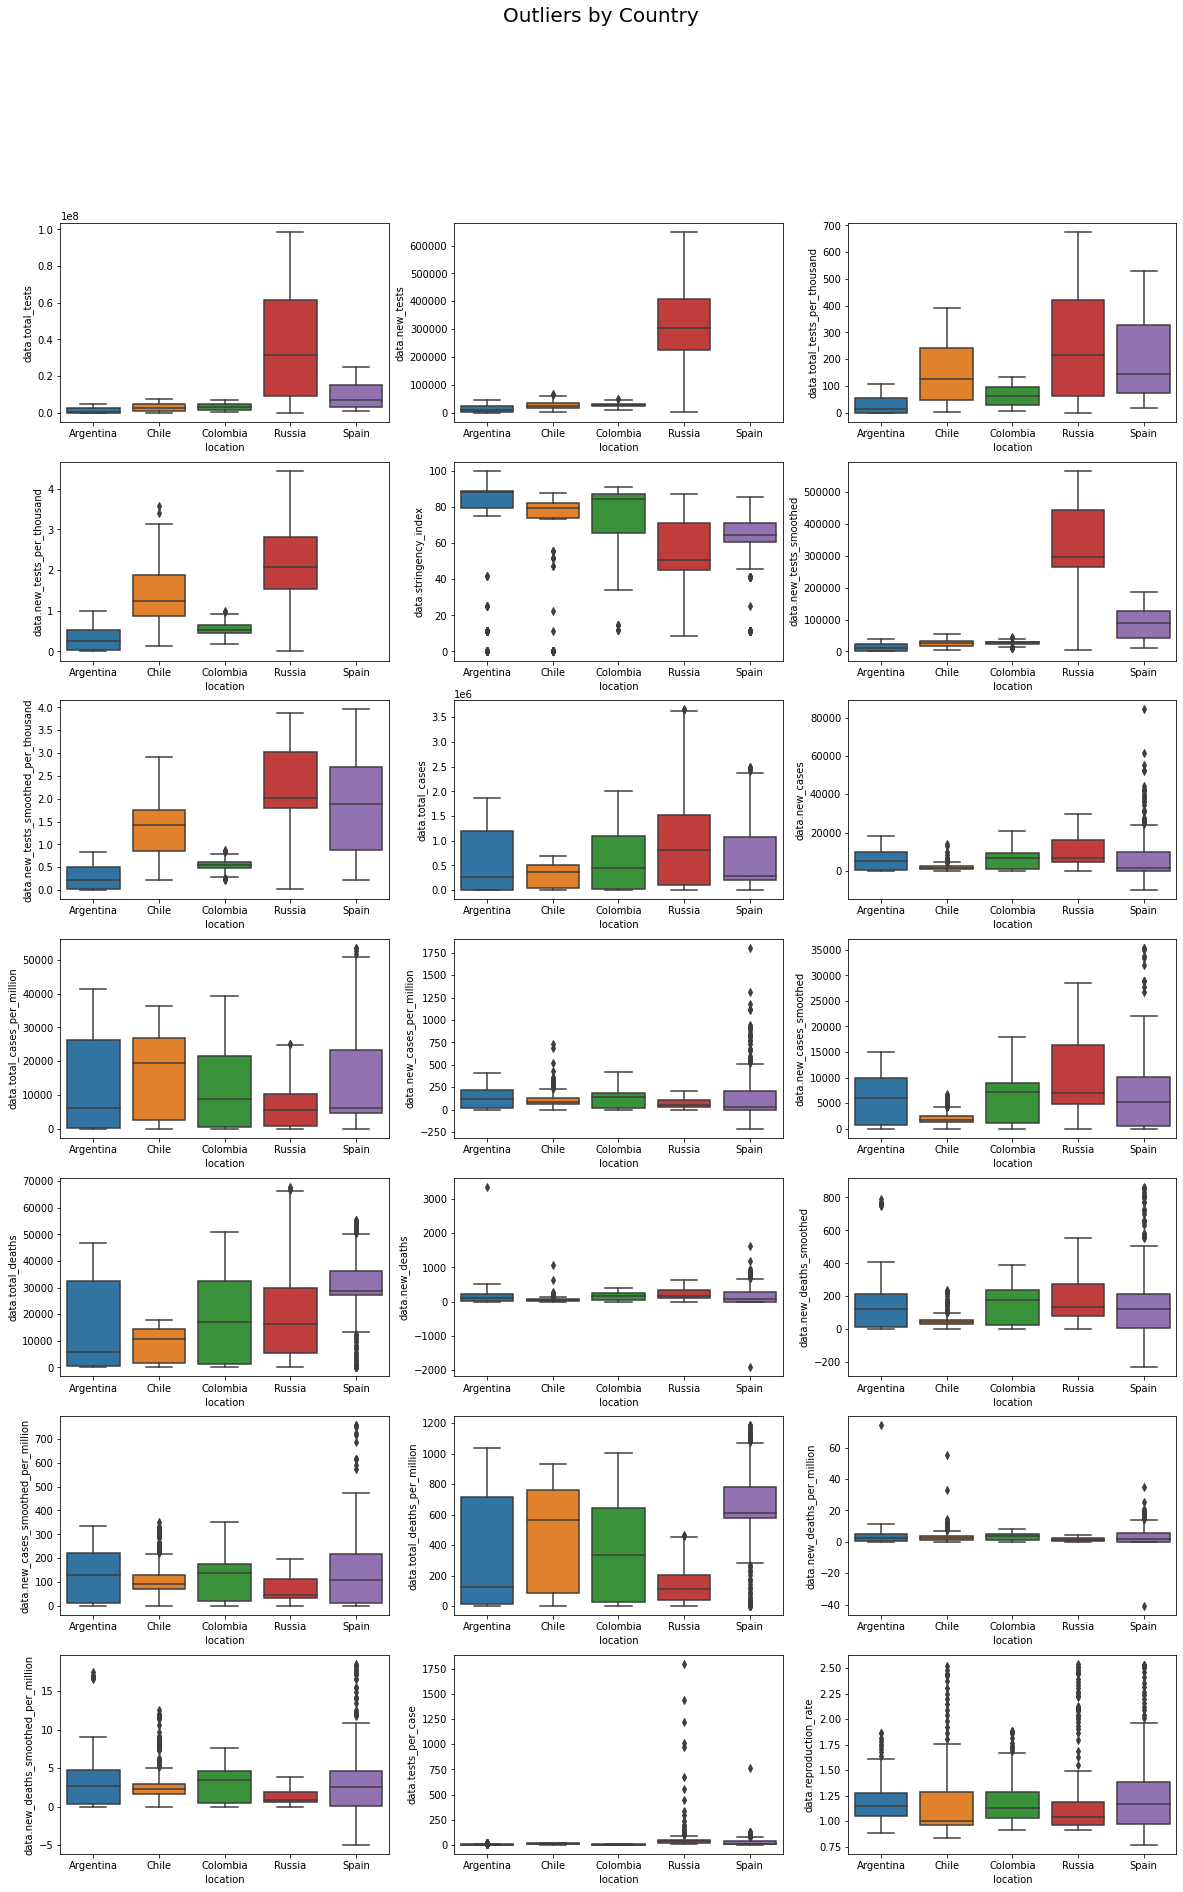

In [11]:
#veo los outliers de todas las columnas excepto 'location', 'population', 'life_expectancy', 'data.date','data.tests_units'
boxplots_per_country(covid,'inicial')

We split our Dataframe in order to eliminate the outliers per column and per country

In [12]:
#quito los outliers por cada pais y respectivamente columna 
datos_inciales=covid.shape
print("Muestra inicial del grupo de 5 paises:",covid.shape)
covid_spain=covid[covid['location']=='Spain']
print("Muestra inicial de España:",covid_spain.shape)
covid_argentina=covid[covid['location']=='Argentina']
print("Muestra inicial de Argentina:",covid_argentina.shape)
covid_russia=covid[covid['location']=='Russia']
print("Muestra inicial de Rusia:",covid_russia.shape)
covid_chile=covid[covid['location']=='Chile']
print("Muestra inicial de Chile:",covid_chile.shape)
covid_colombia=covid[covid['location']=='Colombia']
print("Muestra inicial de Colombia:",covid_chile.shape)

Muestra inicial del grupo de 5 paises: (1766, 27)
Muestra inicial de España: (358, 27)
Muestra inicial de Argentina: (389, 27)
Muestra inicial de Rusia: (359, 27)
Muestra inicial de Chile: (336, 27)
Muestra inicial de Colombia: (336, 27)


SPAIN

In [13]:
# quitamos los outliers para España
print("Muestra inicial del grupo de 5 paises:",covid.shape)
print("Muestra inicial de España:",covid_spain.shape)
covid_spain=remove_outlier(covid_spain, 'data.stringency_index')
covid_spain=remove_outlier(covid_spain, 'data.new_cases')
covid_spain=remove_outlier(covid_spain, 'data.new_cases_per_million')
covid_spain=remove_outlier(covid_spain, 'data.new_cases_smoothed')
covid_spain=remove_outlier(covid_spain, 'data.new_deaths')
covid_spain=remove_outlier(covid_spain, 'data.new_cases_smoothed_per_million')
covid_spain=remove_outlier(covid_spain, 'data.new_deaths_per_million')
covid_spain=remove_outlier(covid_spain, 'data.positive_rate')
covid_spain=remove_outlier(covid_spain, 'data.tests_per_case')
print("Datos sin outliers de España:",covid_spain.shape)

Muestra inicial del grupo de 5 paises: (1766, 27)
Muestra inicial de España: (358, 27)
Datos sin outliers de España: (196, 27)


In [14]:
# quitamos los outliers para Argentina
print("Muestra inicial del grupo de 5 paises:",covid.shape)
print("Muestra inicial de Argentina:",covid_argentina.shape)
covid_argentina=remove_outlier(covid_argentina,'data.stringency_index')
covid_argentina=remove_outlier(covid_argentina,'data.new_deaths')
covid_argentina=remove_outlier(covid_argentina,'data.new_deaths_smoothed')
covid_argentina=remove_outlier(covid_argentina,'data.new_deaths_per_million')
covid_argentina=remove_outlier(covid_argentina,'data.new_deaths_per_million')
covid_argentina=remove_outlier(covid_argentina,'data.new_deaths_smoothed_per_million')
covid_argentina=remove_outlier(covid_argentina, 'data.date')
print("Datos sin outliers Argentina:",covid_argentina.shape)

Muestra inicial del grupo de 5 paises: (1766, 27)
Muestra inicial de Argentina: (389, 27)
Datos sin outliers Argentina: (298, 27)


RUSIA

In [15]:
# quitamos los outliers para Rusia
print("Muestra inicial del grupo de 5 paises:",covid.shape)
print("Muestra inicial de Rusia:",covid_russia.shape)
covid_russia=remove_outlier(covid_russia,'data.tests_per_case')
print("Datos sin outliers Rusia:",covid_russia.shape)

Muestra inicial del grupo de 5 paises: (1766, 27)
Muestra inicial de Rusia: (359, 27)
Datos sin outliers Rusia: (290, 27)


CHILE

In [16]:
# quitamos los outliers para Chile
print("Muestra inicial del grupo de 5 paises:",covid.shape)
print("Muestra inicial de Chile:",covid_chile.shape)
covid_chile=remove_outlier(covid_chile,'data.new_tests')
covid_chile=remove_outlier(covid_chile,'data.new_tests_per_thousand')
covid_chile=remove_outlier(covid_chile,'data.stringency_index')
covid_chile=remove_outlier(covid_chile,'data.new_cases')
covid_chile=remove_outlier(covid_chile,'data.new_cases_per_million')
covid_chile=remove_outlier(covid_chile,'data.new_deaths')
covid_chile=remove_outlier(covid_chile,'data.new_deaths_smoothed')
covid_chile=remove_outlier(covid_chile,'data.new_deaths_per_million')
covid_chile=remove_outlier(covid_chile,'data.new_deaths_smoothed_per_million')
covid_chile=remove_outlier(covid_chile,'data.positive_rate')
print("Datos sin outliers Chile:",covid_chile.shape)

Muestra inicial del grupo de 5 paises: (1766, 27)
Muestra inicial de Chile: (336, 27)
Datos sin outliers Chile: (145, 27)


COLOMBIA

In [17]:
# quitamos los outliers para Colombia
print("Muestra inicial del grupo de 5 paises:",covid.shape)
print("Muestra inicial de Colombia:",covid_colombia.shape)
covid_colombia=remove_outlier(covid_colombia,'data.new_tests')
covid_colombia=remove_outlier(covid_colombia,'data.stringency_index')
covid_colombia=remove_outlier(covid_colombia,'data.new_tests_per_thousand')
covid_colombia=remove_outlier(covid_colombia,'data.new_tests_smoothed')
covid_colombia=remove_outlier(covid_colombia,'data.new_tests_smoothed_per_thousand')
print("Datos sin outliers Colombia:",covid_colombia.shape)

Muestra inicial del grupo de 5 paises: (1766, 27)
Muestra inicial de Colombia: (324, 27)
Datos sin outliers Colombia: (208, 27)


In [18]:
#juntamos los datos limpios
covid=pd.concat([covid_spain,covid_argentina,covid_russia,covid_chile,covid_colombia])
print("Datos sin outliers del grupo de 5 paises",covid.shape)

Datos sin outliers del grupo de 5 paises (1137, 27)


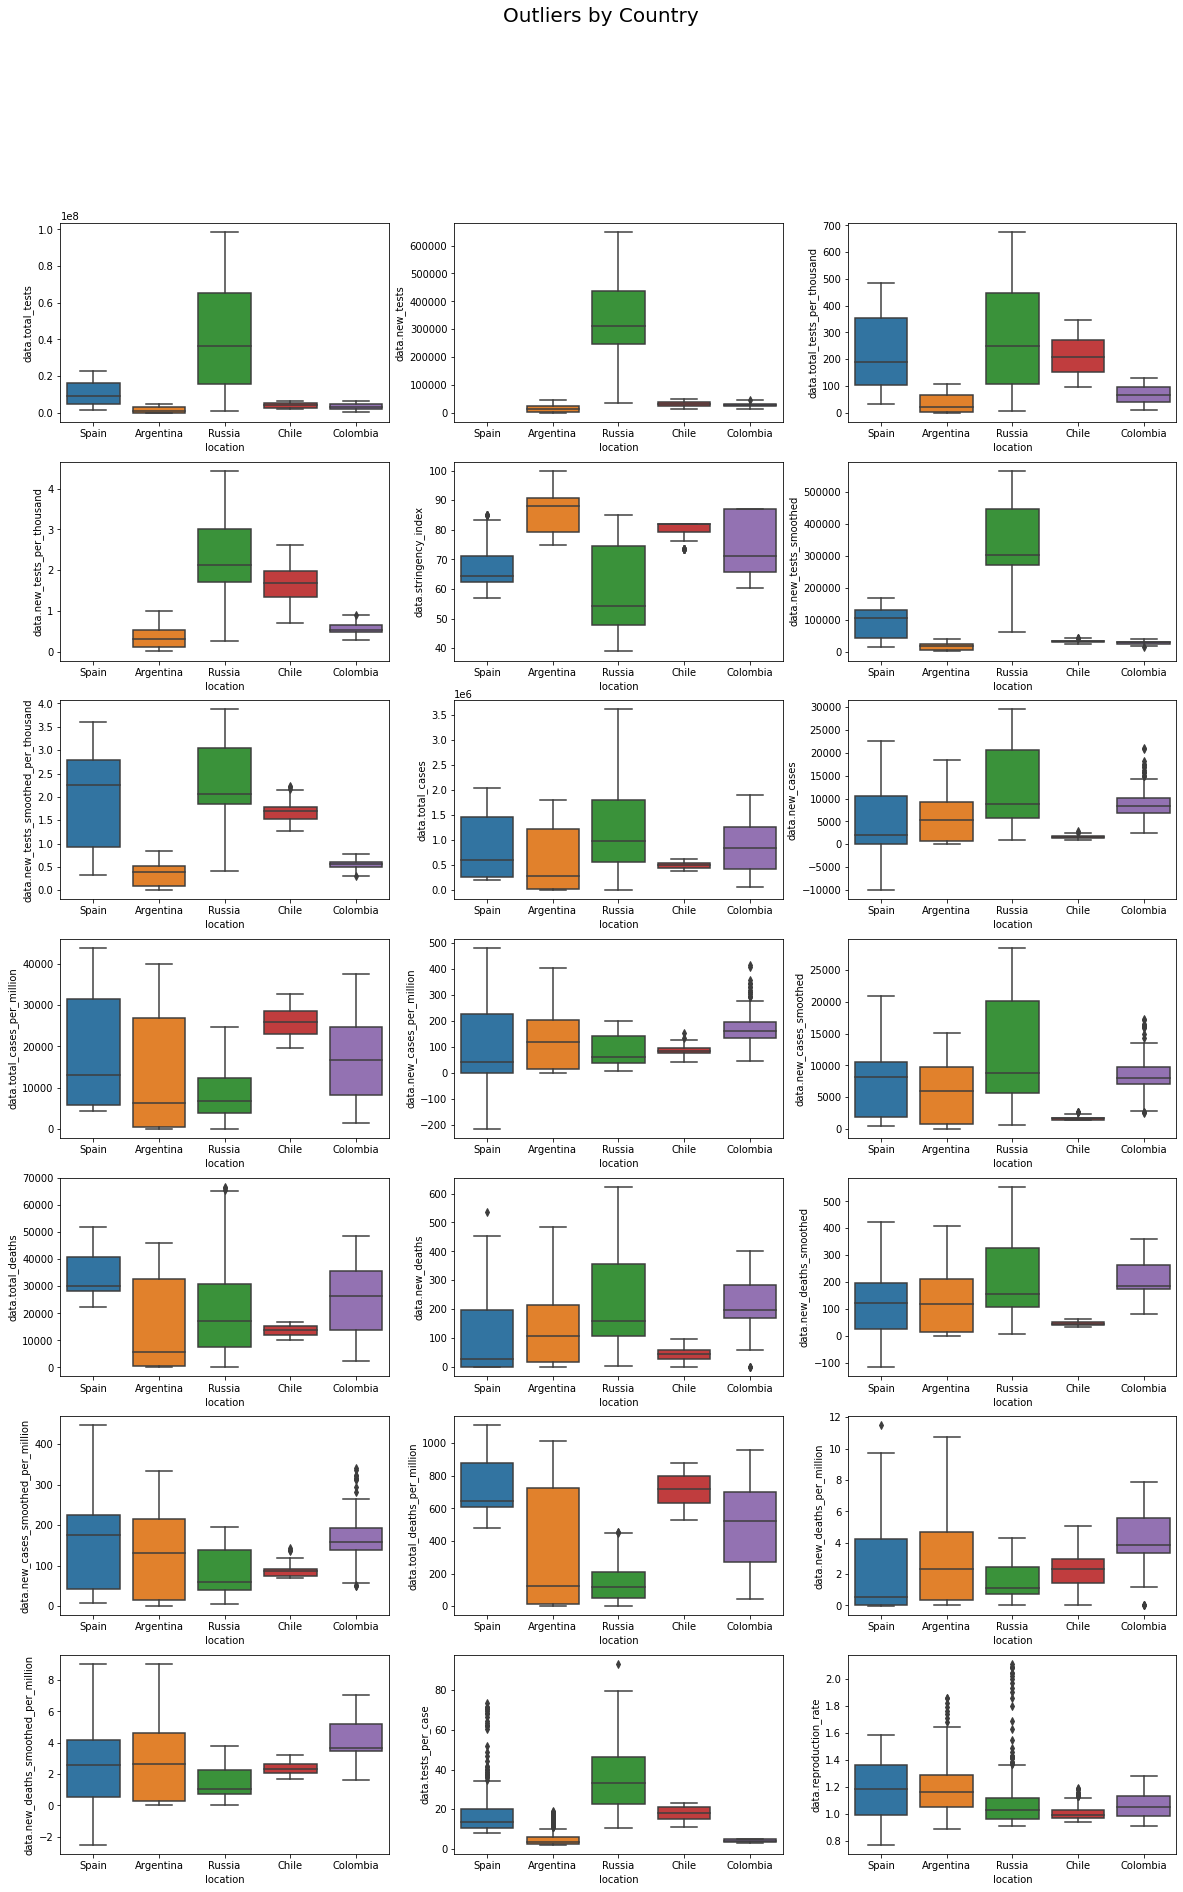

In [19]:
boxplots_per_country(covid,'CLEANED')

Option C: 8. Per country, which are the columns that are more related find the correlation between columns with the correlation matrix.

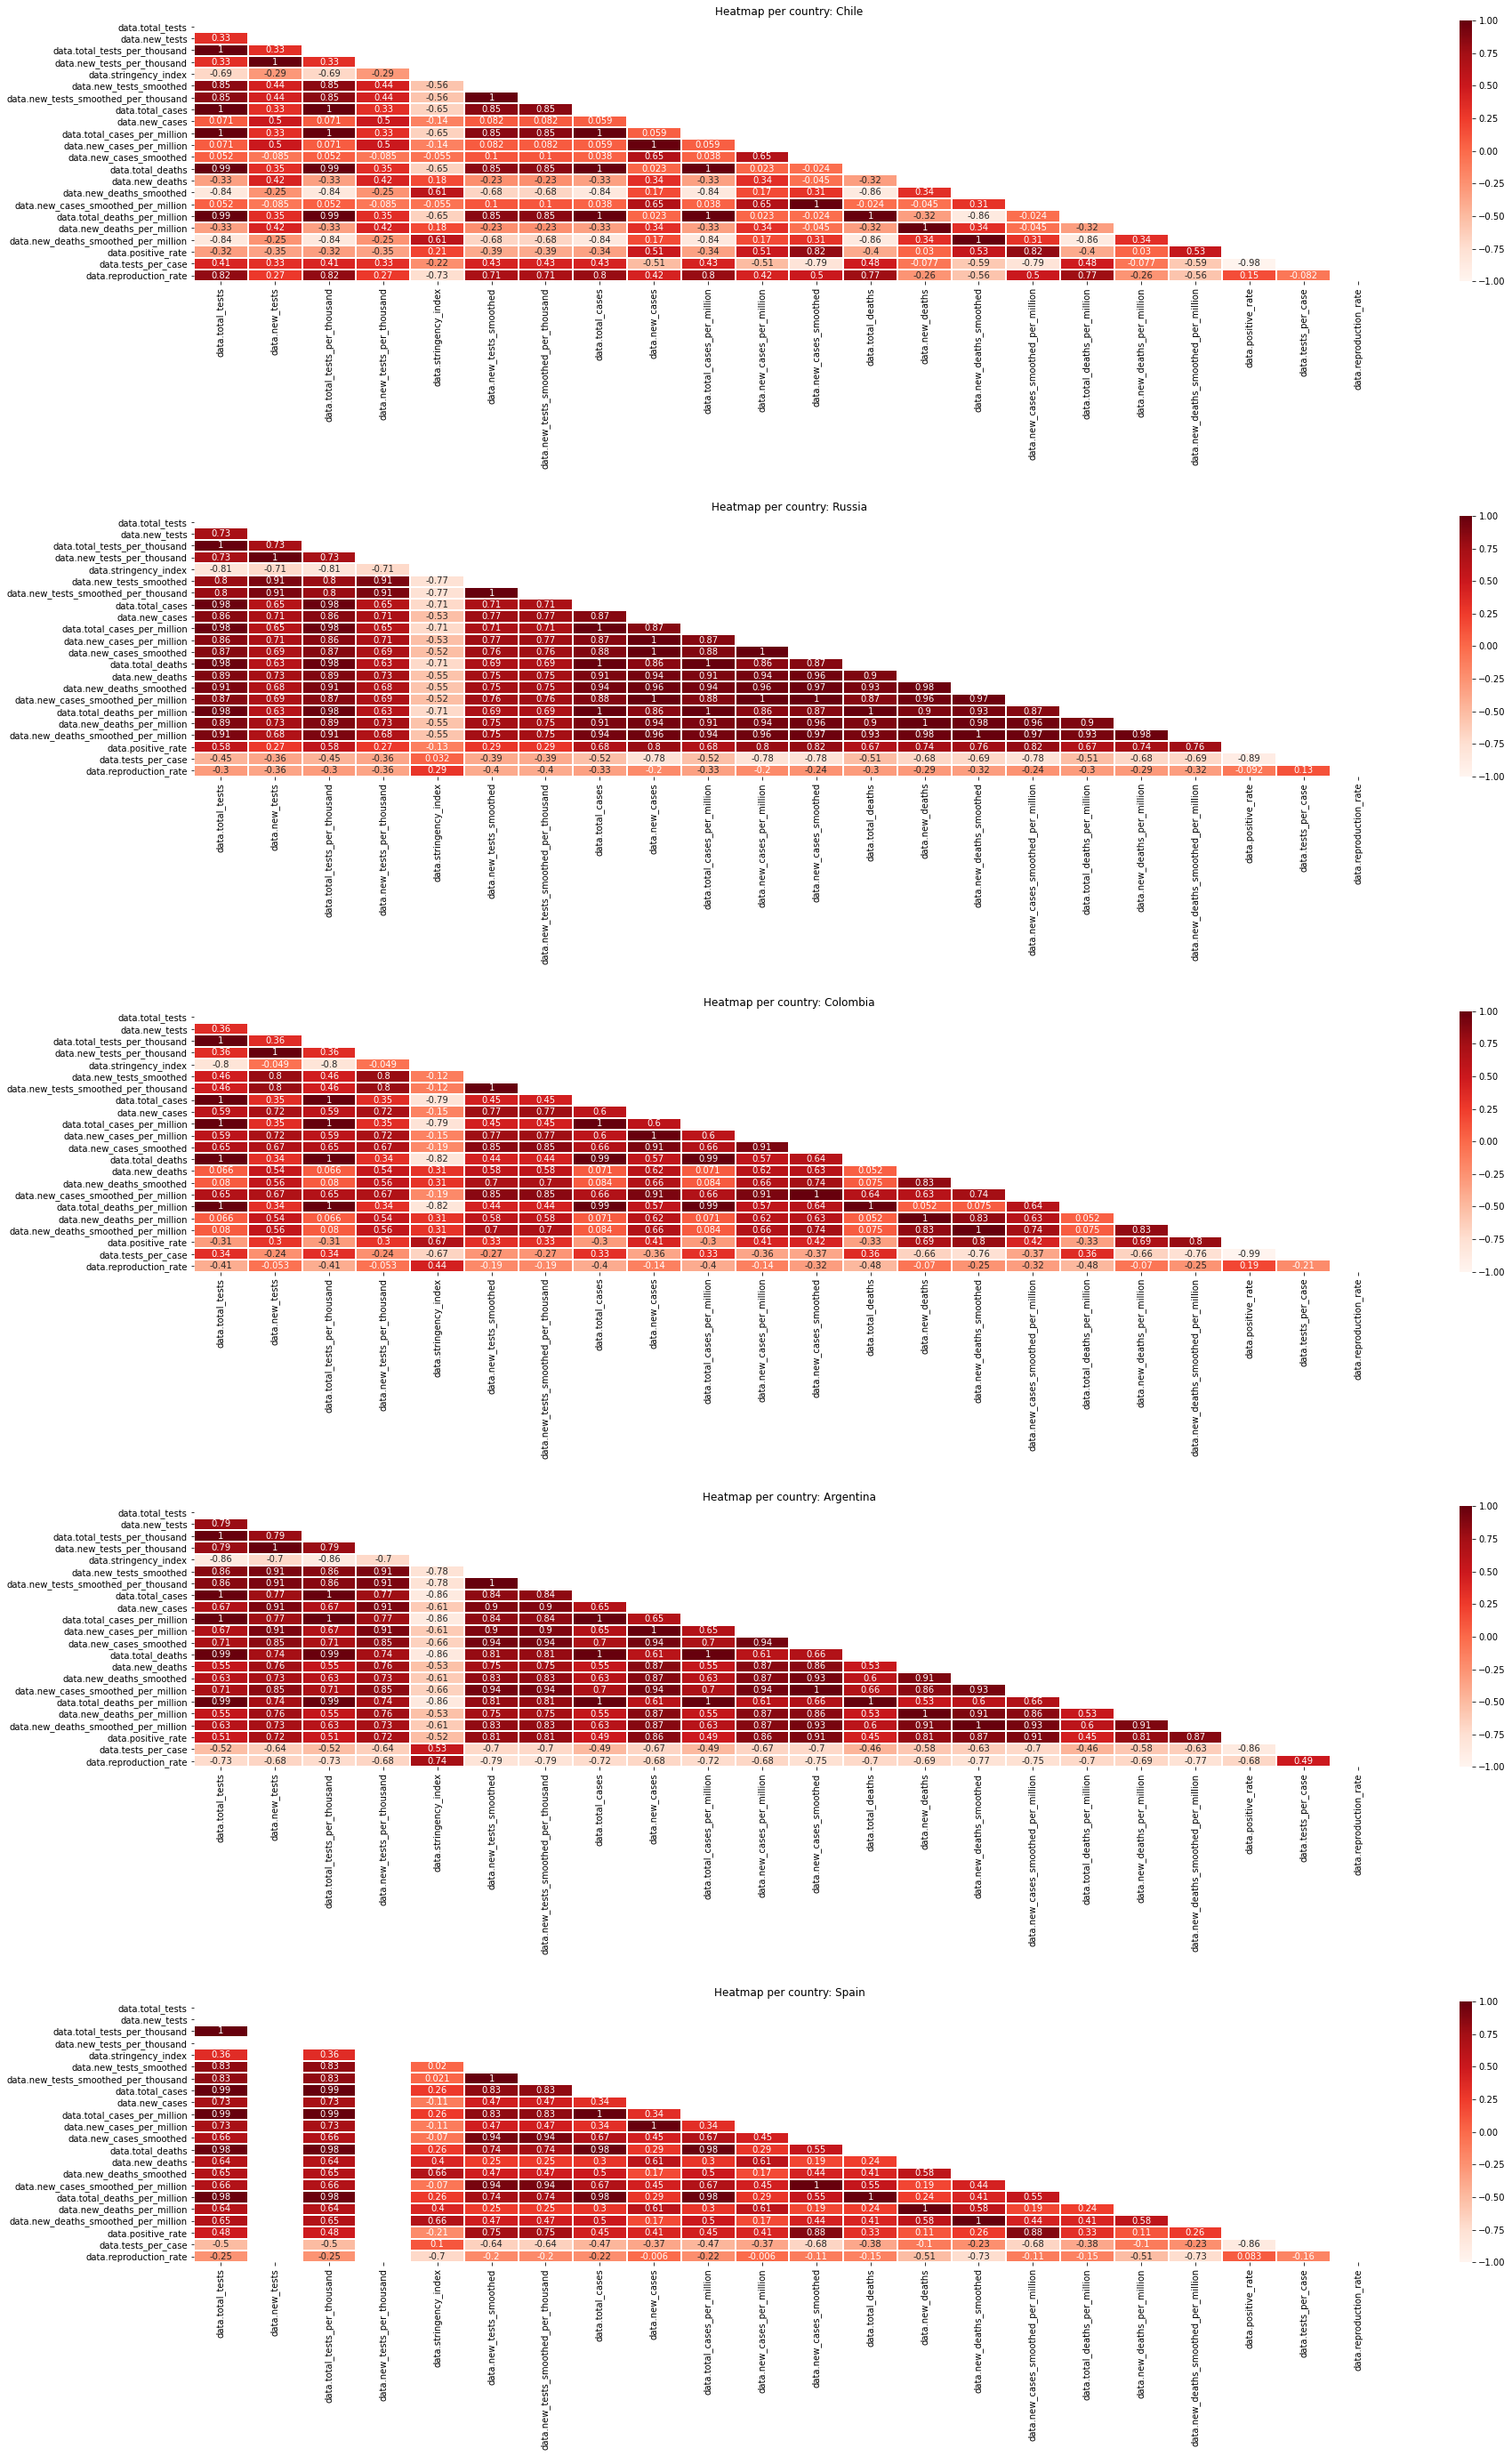

In [20]:
heatmap_per_country(covid)

In [21]:
columns_correlation_pivot(covid_chile,0.97,0.80)

Corr
column_1                                      
data.total_tests_per_thousand         4.212227
data.total_tests                      4.212227
data.new_tests_smoothed               3.413920
data.new_tests_smoothed_per_thousand  3.413873
data.total_cases                      2.490830
data.total_cases_per_million          2.490830
data.total_deaths                     1.722457
data.total_deaths_per_million         0.861252
data.new_deaths_smoothed              0.861204
data.new_cases_smoothed               0.822792
data.new_cases_smoothed_per_million   0.822792

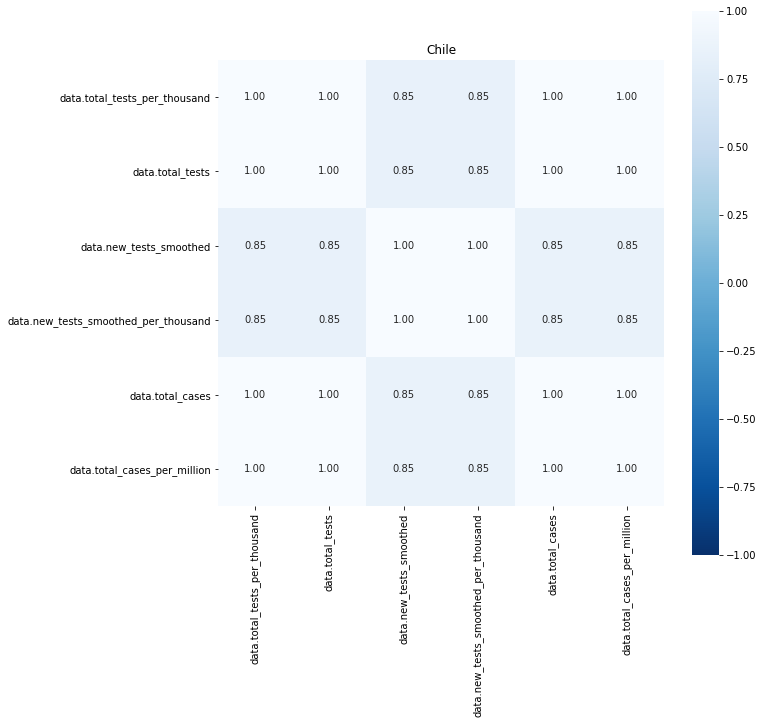

In [22]:
heatmap_with_column_filters(covid_chile,'Chile',
                            'data.total_tests_per_thousand',
                            'data.total_tests',
                            'data.new_tests_smoothed',
                            'data.new_tests_smoothed_per_thousand',
                            'data.total_cases',
                            'data.total_cases_per_million')

In [23]:
columns_correlation_pivot(covid_spain,0.97,0.80)

Corr
column_1                                      
data.new_tests_smoothed               3.542538
data.new_tests_smoothed_per_thousand  3.542529
data.total_tests_per_thousand         1.662880
data.total_tests                      1.662879
data.new_cases_smoothed               0.876115
data.new_cases_smoothed_per_million   0.876115
data.positive_rate                    0.860349

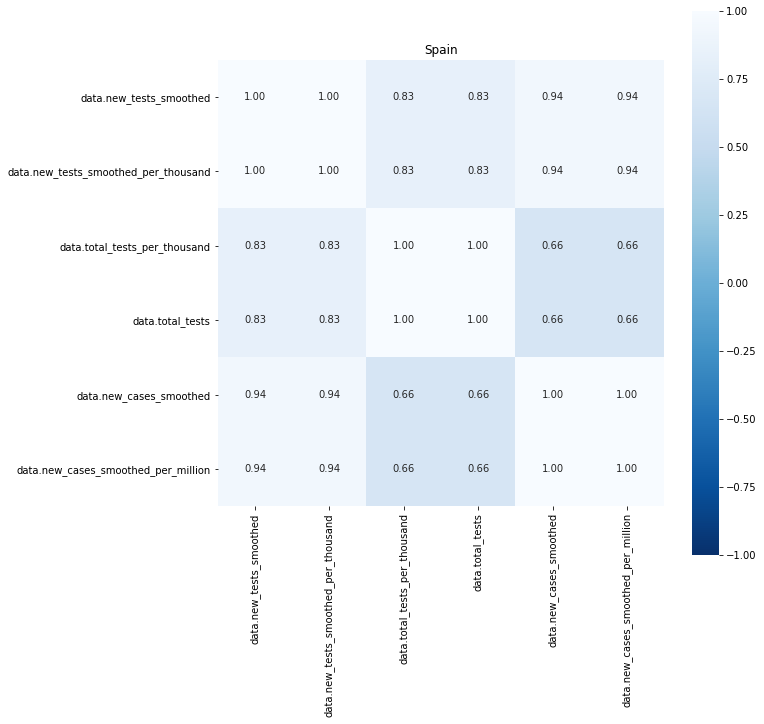

In [24]:
heatmap_with_column_filters(covid_spain,'Spain',
                            'data.new_tests_smoothed',
                            'data.new_tests_smoothed_per_thousand',
                            'data.total_tests_per_thousand',
                            'data.total_tests',
                            'data.new_cases_smoothed',
                            'data.new_cases_smoothed_per_million')

In [25]:
columns_correlation_pivot(covid_russia,0.97,0.80)

Corr
column_1                                     
data.total_tests_per_thousand        7.869461
data.total_tests                     7.869461
data.total_cases                     7.214056
data.new_cases                       7.201034
data.total_cases_per_million         6.344177
data.new_cases_per_million           6.331155
data.total_deaths                    4.535948
data.new_cases_smoothed              4.475004
data.new_cases_smoothed_per_million  2.646522
data.new_deaths                      1.859731
data.total_deaths_per_million        1.831704
data.new_tests_per_thousand          1.814319
data.new_tests                       1.814314
data.new_deaths_smoothed             0.927912
data.positive_rate                   0.894840

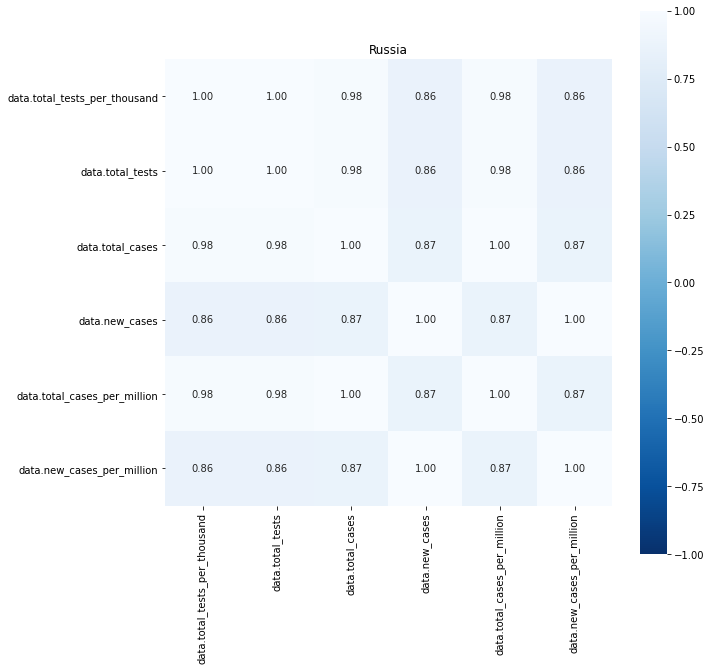

In [26]:
heatmap_with_column_filters(covid_russia,'Russia',
                            'data.total_tests_per_thousand',
                            'data.total_tests',
                            'data.total_cases',
                            'data.new_cases',
                            'data.total_cases_per_million',
                            'data.new_cases_per_million')

In [27]:
columns_correlation_pivot(covid_argentina,0.97,0.80)

Corr
column_1                                      
data.new_tests_smoothed_per_thousand  9.436339
data.new_tests_smoothed               9.436115
data.new_cases_per_million            6.225683
data.new_cases                        6.225683
data.new_tests                        5.339072
data.new_tests_per_thousand           5.338995
data.new_cases_smoothed               4.483868
data.new_deaths                       3.475137
data.stringency_index                 3.437438
data.new_deaths_smoothed              2.709187
data.new_cases_smoothed_per_million   2.694465
data.total_tests_per_thousand         2.588009
data.total_tests                      2.588008
data.new_deaths_per_million           1.714545
data.new_deaths_smoothed_per_million  0.869649
data.positive_rate                    0.863314

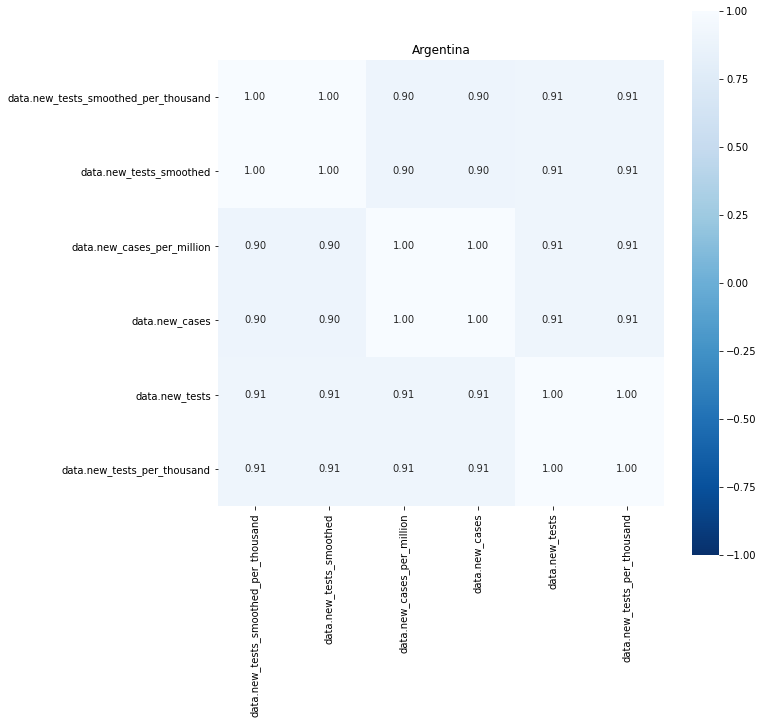

In [28]:
heatmap_with_column_filters(covid_argentina,'Argentina',
                            'data.new_tests_smoothed_per_thousand',
                            'data.new_tests_smoothed',
                            'data.new_cases_per_million',
                            'data.new_cases',
                            'data.new_tests',
                            'data.new_tests_per_thousand')

In [29]:
columns_correlation_pivot(covid_colombia,0.97,0.80)

Corr
column_1                                      
data.new_cases_per_million            1.815032
data.new_cases                        1.815032
data.new_tests_smoothed               1.705871
data.new_tests_smoothed_per_thousand  1.705612
data.new_deaths                       1.652398
data.stringency_index                 1.631222
data.new_tests                        1.604918
data.new_tests_per_thousand           1.604886
data.new_deaths_per_million           0.826206
data.new_deaths_smoothed              0.826198
data.total_tests                      0.800185
data.total_tests_per_thousand         0.800184

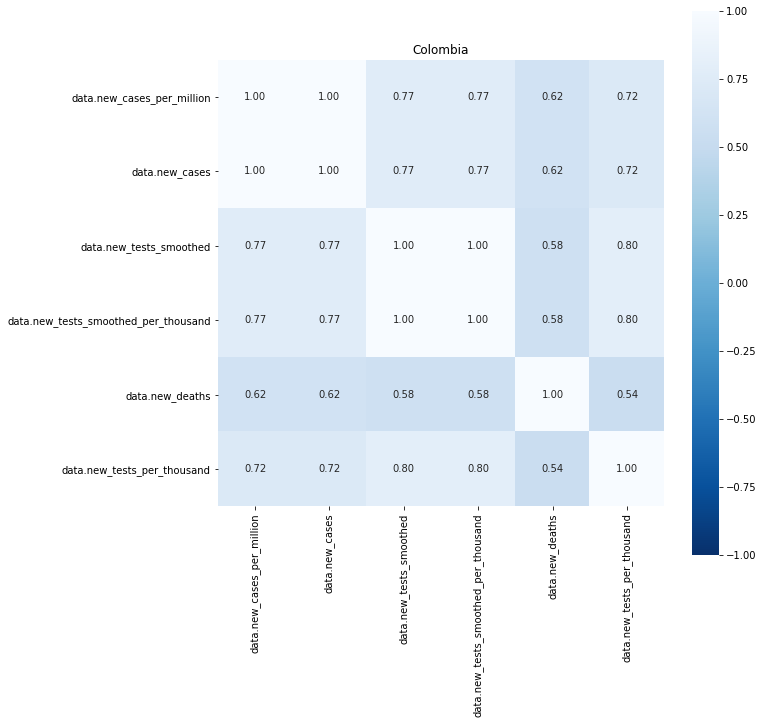

In [30]:
heatmap_with_column_filters(covid_colombia,'Colombia',
                            'data.new_cases_per_million',
                            'data.new_cases',
                            'data.new_tests_smoothed',
                            'data.new_tests_smoothed_per_thousand',
                            'data.new_deaths',
                            'data.new_tests_per_thousand')

In [31]:
covid.isna().sum().sort_values(ascending=False)

data.new_tests                          210
data.new_tests_per_thousand             210
data.total_tests                        176
data.total_tests_per_thousand           176
data.reproduction_rate                   35
data.new_tests_smoothed_per_thousand      2
data.positive_rate                        2
data.tests_units                          2
data.stringency_index                     2
data.new_tests_smoothed                   2
data.tests_per_case                       2
population                                0
life_expectancy                           0
data.date                                 0
data.new_cases                            0
data.total_cases                          0
data.total_cases_per_million              0
data.new_cases_per_million                0
data.new_cases_smoothed                   0
data.total_deaths                         0
data.new_deaths                           0
data.new_deaths_smoothed                  0
data.new_cases_smoothed_per_mill

OPTION C 6. Show different tendencies for each column in your dataset. Show, vertically, the start date and end date of the alarm state in each plot. If there is no alarm state, then show only the start date

In [32]:
covid.set_index('data.date', inplace=True)
covid

location  population  life_expectancy  data.total_tests  \
data.date                                                             
2020-04-24     Spain  46754783.0            83.56               NaN   
2020-04-25     Spain  46754783.0            83.56               NaN   
2020-04-26     Spain  46754783.0            83.56               NaN   
2020-04-27     Spain  46754783.0            83.56               NaN   
2020-04-28     Spain  46754783.0            83.56               NaN   
...              ...         ...              ...               ...   
2021-01-12  Colombia  50882884.0            77.29         6446939.0   
2021-01-13  Colombia  50882884.0            77.29         6484230.0   
2021-01-15  Colombia  50882884.0            77.29         6576146.0   
2021-01-16  Colombia  50882884.0            77.29         6615379.0   
2021-01-17  Colombia  50882884.0            77.29         6656335.0   

            data.new_tests  data.total_tests_per_thousand  \
data.date                                                   
2020-04-24             NaN                            NaN   
2020-04-25             NaN                            NaN   
2020-04-26             NaN                            NaN   
2020-04-27             NaN                            NaN   
2020-04-28             NaN                            NaN   
...                    ...                            ...   
2021-01-12         26789.0                        126.702   
2021-01-13         37291.0                        127.434   
2021-01-15         45862.0                        129.241   
2021-01-16         39233.0                        130.012   
2021-01-17         40956.0                        130.817   

            data.new_tests_per_thousand data.tests_units  \
data.date                                                  
2020-04-24                          NaN  tests performed   
2020-04-25                          NaN  tests performed   
2020-04-26                          NaN  tests performed   
2020-04-27                          NaN  tests performed   
2020-04-28                          NaN  tests performed   
...                                 ...              ...   
2021-01-12                        0.526  tests performed   
2021-01-13                        0.733  tests performed   
2021-01-15                        0.901  tests performed   
2021-01-16                        0.771  tests performed   
2021-01-17                        0.805  tests performed   

            data.stringency_index  data.new_tests_smoothed  ...  \
data.date                                                   ...   
2020-04-24                  85.19                  15466.0  ...   
2020-04-25                  85.19                  20403.0  ...   
2020-04-26                  85.19                  25340.0  ...   
2020-04-27                  85.19                  30276.0  ...   
2020-04-28                  85.19                  35213.0  ...   
...                           ...                      ...  ...   
2021-01-12                  81.02                  34954.0  ...   
2021-01-13                  81.02                  35484.0  ...   
2021-01-15                  81.02                  39051.0  ...   
2021-01-16                  81.02                  38657.0  ...   
2021-01-17                  81.02                  38491.0  ...   

            data.total_deaths  data.new_deaths  data.new_deaths_smoothed  \
data.date                                                                  
2020-04-24            22524.0            367.0                   360.286   
2020-04-25            22902.0            378.0                   408.429   
2020-04-26            23190.0            288.0                   391.000   
2020-04-27            23521.0            331.0                   381.286   
2020-04-28            23822.0            301.0                   362.857   
...                       ...              ...                       ...   
2021-01-12            46782.0    

location                  5
data.stringency_index    41
dtype: int64
------
Argentina    298
Russia       288
Colombia     208
Spain        196
Chile        145
Name: location, dtype: int64
------
------


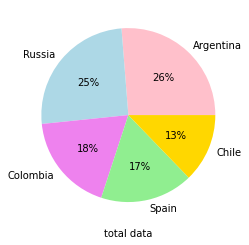

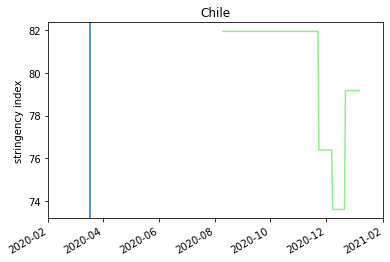

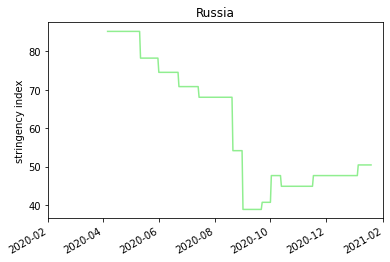

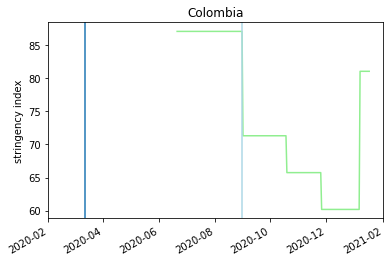

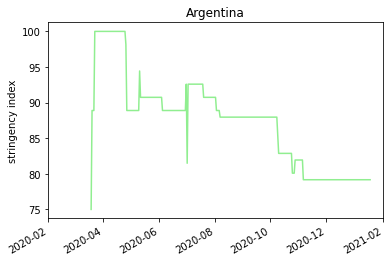

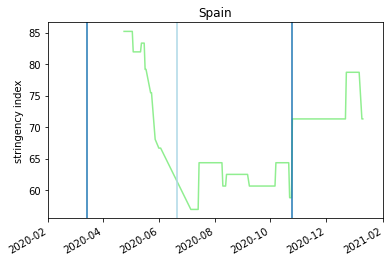

In [33]:
plot_clean_columns(df_name=covid, df_column='data.stringency_index', y_label='stringency index') # mejor si no quitamos outliers

location                                  5
data.new_cases_per_million             1052
data.new_cases_smoothed_per_million    1067
dtype: int64
------
Argentina    293
Russia       290
Colombia     208
Chile        145
Spain        135
Name: location, dtype: int64
------
------


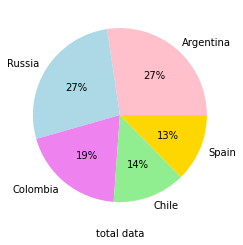

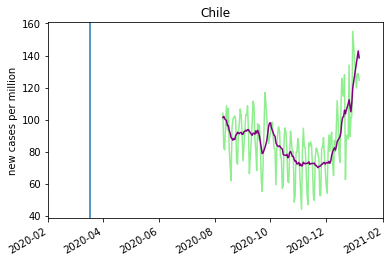

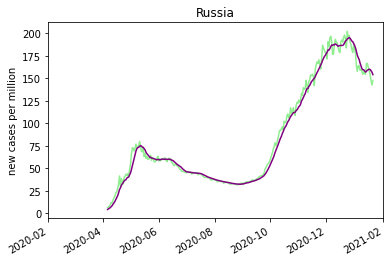

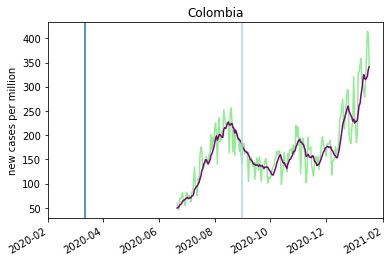

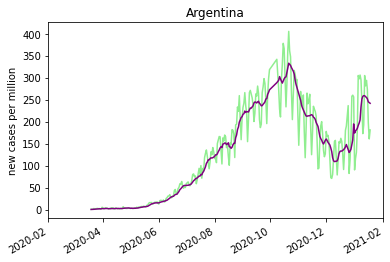

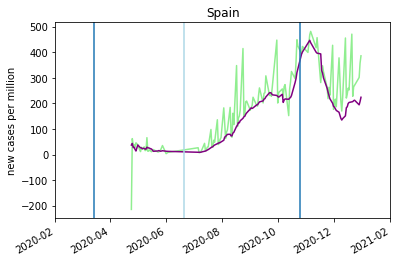

In [64]:
plot_clean_columns(df_name=covid, column_1='data.new_cases_per_million', column_2='data.new_cases_smoothed_per_million', y_label='new cases per million')

location                           5
data.total_cases_per_million    1076
dtype: int64
------
Argentina    298
Russia       290
Colombia     208
Spain        196
Chile        145
Name: location, dtype: int64
------
------


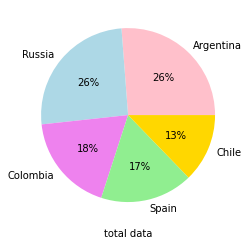

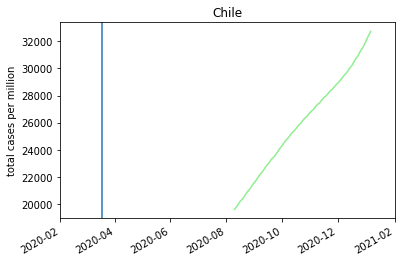

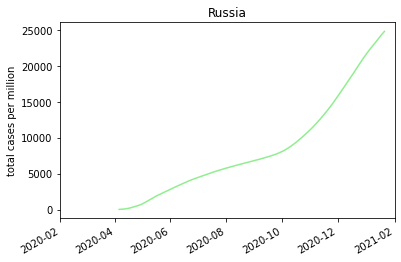

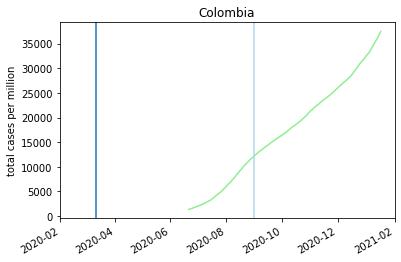

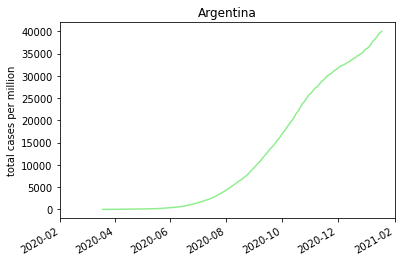

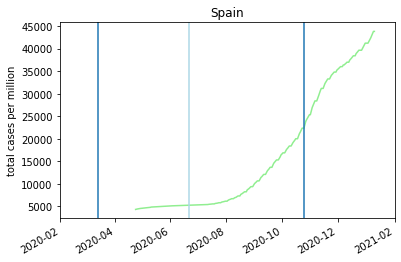

In [66]:
plot_clean_columns(df_name=covid, column_1='data.total_cases_per_million', y_label='total cases per million')

location                            5
data.total_deaths_per_million    1071
dtype: int64
------
Argentina    298
Russia       290
Colombia     208
Spain        196
Chile        145
Name: location, dtype: int64
------
------


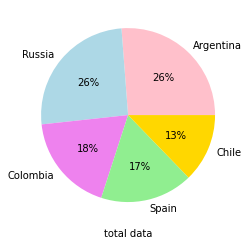

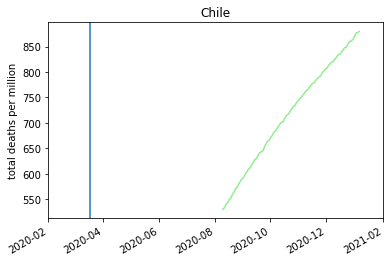

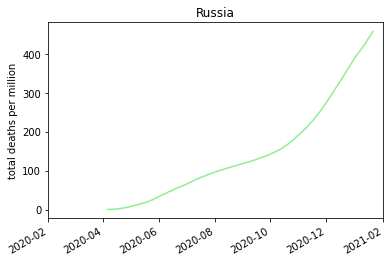

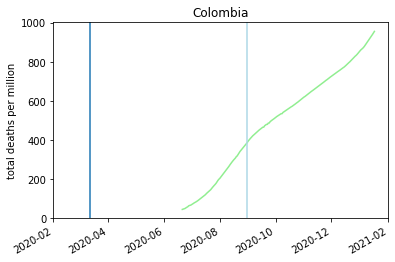

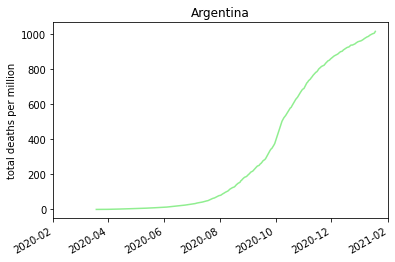

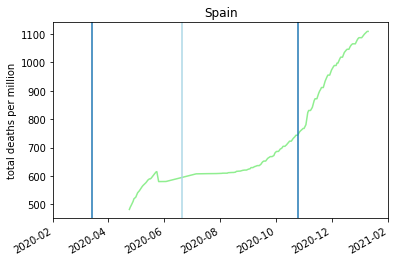

In [67]:
plot_clean_columns(df_name=covid, column_1='data.total_deaths_per_million', y_label='total deaths per million')

location                                  5
data.new_deaths_per_million             662
data.new_deaths_smoothed_per_million    896
dtype: int64
------
Argentina    294
Russia       290
Colombia     204
Chile        143
Spain        133
Name: location, dtype: int64
------
------


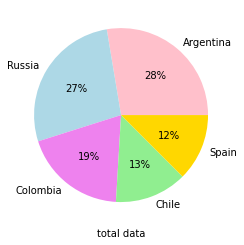

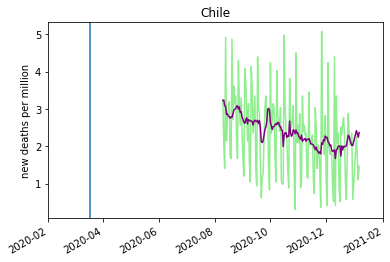

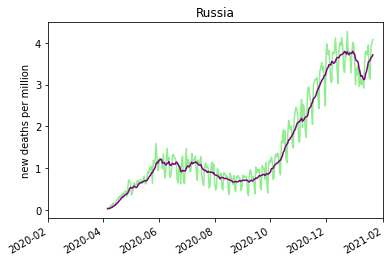

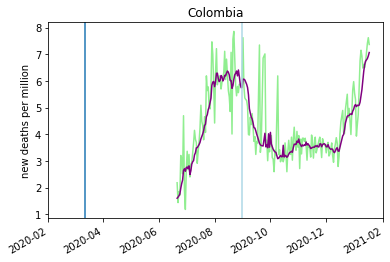

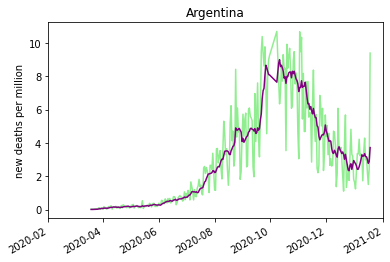

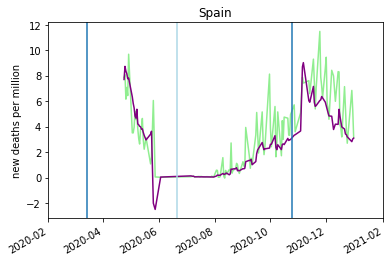

In [68]:
plot_clean_columns(df_name=covid, column_1='data.new_deaths_per_million', column_2='data.new_deaths_smoothed_per_million', y_label='new deaths per million')

location                    5
data.reproduction_rate    101
dtype: int64
------
Argentina    286
Russia       277
Colombia     200
Spain        194
Chile        145
Name: location, dtype: int64
------
------


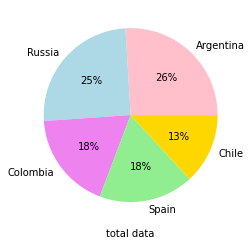

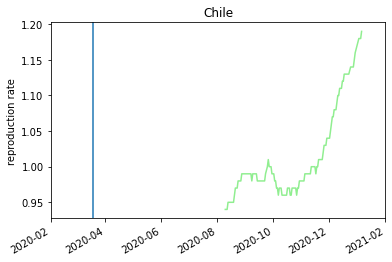

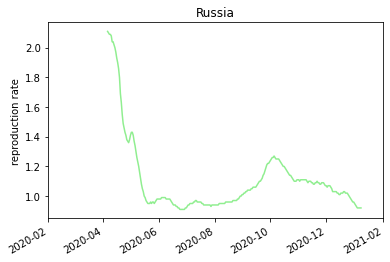

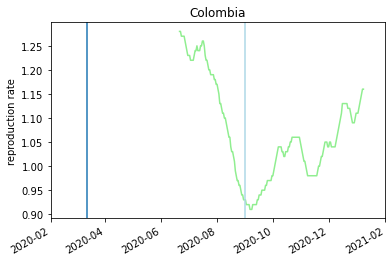

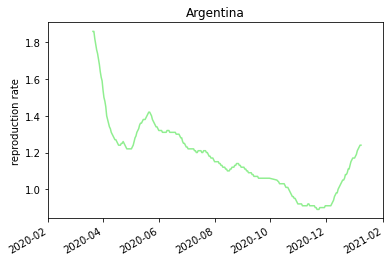

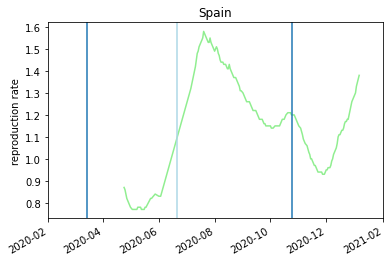

In [69]:
plot_clean_columns(df_name=covid, column_1='data.reproduction_rate', y_label='reproduction rate')

location                5
data.positive_rate    342
dtype: int64
------
Argentina    296
Russia       290
Colombia     208
Spain        196
Chile        145
Name: location, dtype: int64
------
------


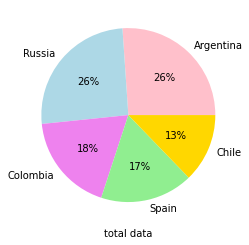

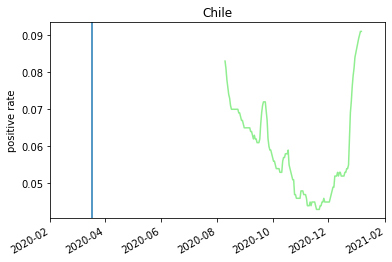

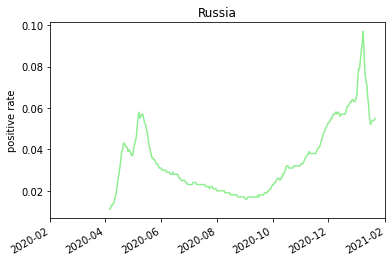

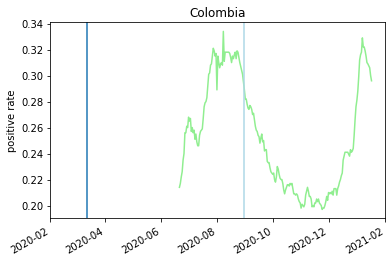

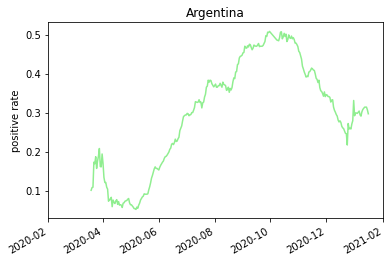

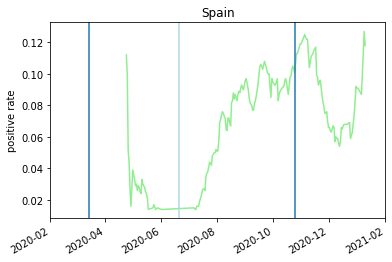

In [71]:
plot_clean_columns(df_name=covid, column_1='data.positive_rate', y_label='positive rate')

location                 5
data.tests_per_case    368
dtype: int64
------
Argentina    296
Russia       290
Colombia     208
Spain        196
Chile        145
Name: location, dtype: int64
------
------


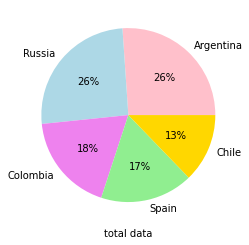

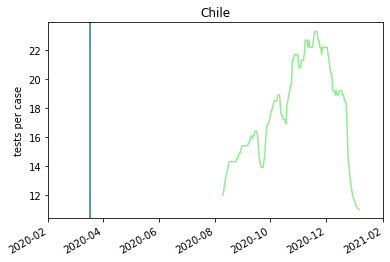

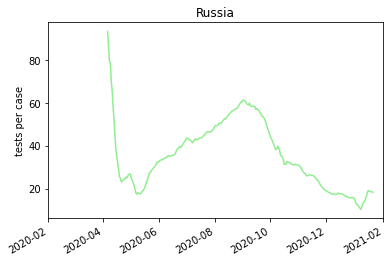

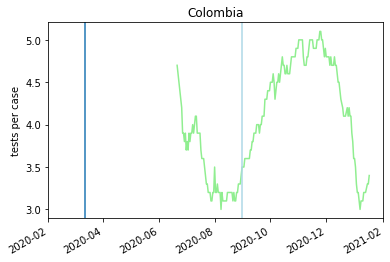

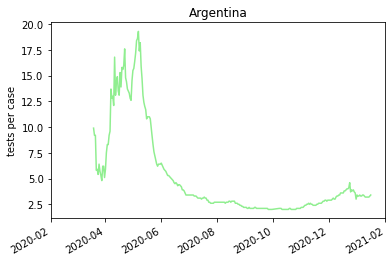

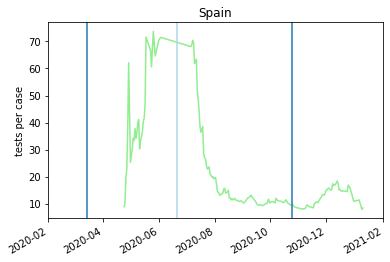

In [75]:
plot_clean_columns(df_name=covid, column_1='data.tests_per_case', y_label='tests per case')

location                           5
data.total_tests_per_thousand    960
dtype: int64
------
Argentina    296
Russia       284
Colombia     208
Chile        145
Spain         28
Name: location, dtype: int64
------
------


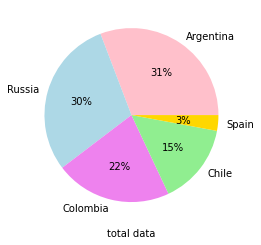

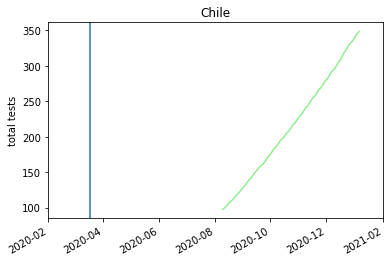

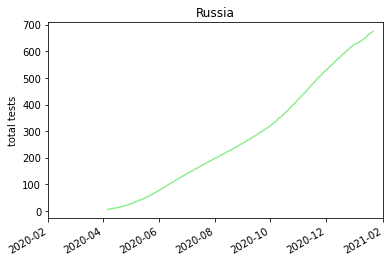

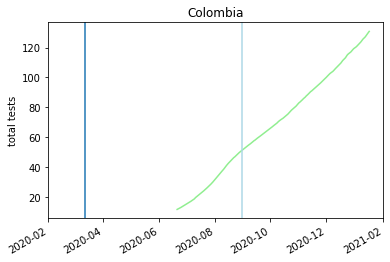

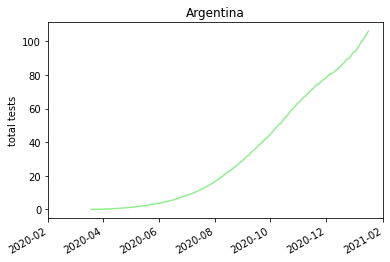

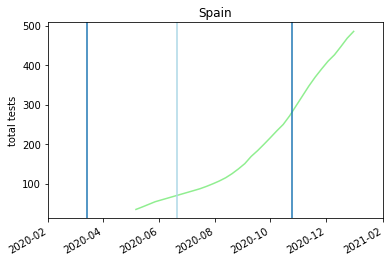

In [79]:
plot_clean_columns(df_name=covid, column_1='data.total_tests_per_thousand', y_label='total tests')

location                                  4
data.new_tests_per_thousand             773
data.new_tests_smoothed_per_thousand    698
dtype: int64
------
Argentina    296
Russia       278
Colombia     208
Chile        145
Name: location, dtype: int64
------
------


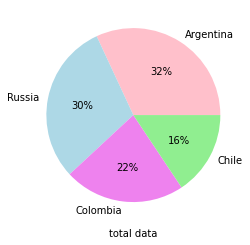

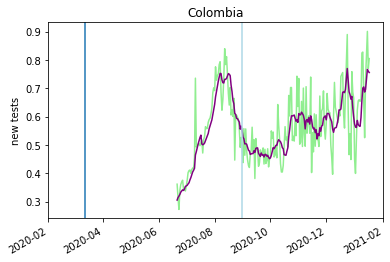

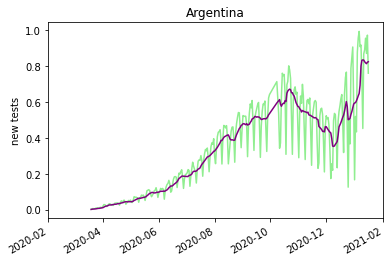

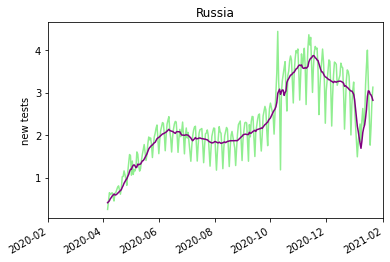

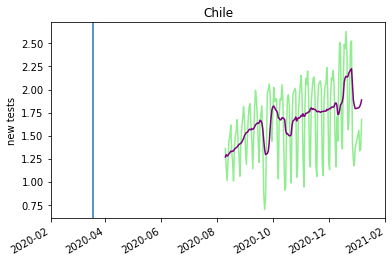

In [80]:
plot_clean_columns(df_name=covid, column_1='data.new_tests_per_thousand', column_2='data.new_tests_smoothed_per_thousand', y_label='new tests')

OPTION C: 10. Answer the questions:
    a. What position do your countries occupe respect to the number of total infected, total deaths and total recoveries?

In [44]:
#Agrupamos las columnas que nos interesan
covid_position= group(dt=data_complete_clean(), col1="location", col2="data.total_cases_per_million",col3= "data.total_deaths_per_million", col4="life_expectancy")
covid_position

data.total_cases_per_million  data.total_deaths_per_million  \
location                                                                   
Afghanistan                    744.953110                      29.193201   
Albania                       5645.517343                     127.544292   
Algeria                        883.760707                      31.734003   
Andorra                      34885.916814                     735.661737   
Angola                         173.402426                       4.710262   
...                                   ...                            ...   
Vietnam                          7.118700                       0.331944   
World                         3395.768179                      93.608372   
Yemen                           49.977284                      15.331584   
Zambia                         548.967042                      11.794249   
Zimbabwe                       404.593165                      11.098560   

             life_expectancy  
location                      
Afghanistan            64.83  
Albania                78.57  
Algeria                76.88  
Andorra                83.73  
Angola                 61.15  
...                      ...  
Vietnam                75.40  
World                  72.58  
Yemen                  66.12  
Zambia                 63.89  
Zimbabwe               61.49  

[192 rows x 3 columns]

In [45]:
#Filtramos y ordenamos cada columna por orden para comprobar la posicion que ocupan nuestros paises
cases_col= sort_columns(dt=covid_position, col_name="data.total_cases_per_million")
deaths_col = sort_columns(dt=covid_position, col_name="data.total_deaths_per_million")
life_col = sort_columns(dt=covid_position, col_name="life_expectancy")

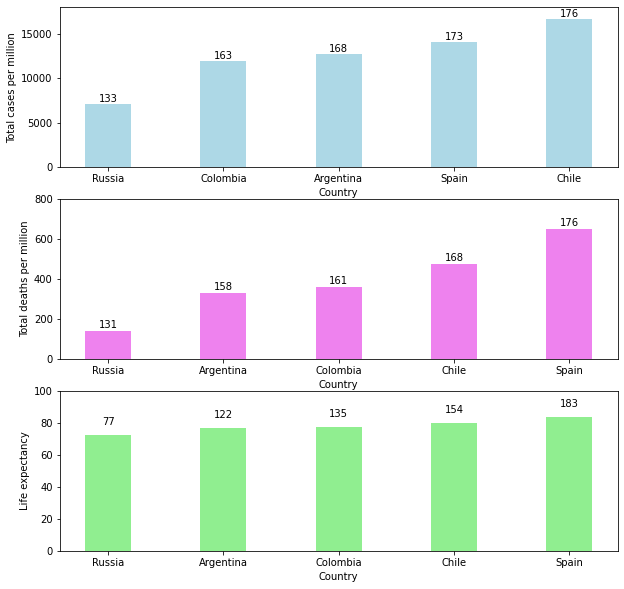

In [46]:
#Representamos nuestros paises, respecto al total 
position_countries(dt1=cases_col, dt2=deaths_col, dt3= life_col)

In [52]:
covid= covid.reset_index()
covid

data.date  location  population  life_expectancy  data.total_tests  \
0    2020-04-24     Spain  46754783.0            83.56               NaN   
1    2020-04-25     Spain  46754783.0            83.56               NaN   
2    2020-04-26     Spain  46754783.0            83.56               NaN   
3    2020-04-27     Spain  46754783.0            83.56               NaN   
4    2020-04-28     Spain  46754783.0            83.56               NaN   
...         ...       ...         ...              ...               ...   
1132 2021-01-12  Colombia  50882884.0            77.29         6446939.0   
1133 2021-01-13  Colombia  50882884.0            77.29         6484230.0   
1134 2021-01-15  Colombia  50882884.0            77.29         6576146.0   
1135 2021-01-16  Colombia  50882884.0            77.29         6615379.0   
1136 2021-01-17  Colombia  50882884.0            77.29         6656335.0   

      data.new_tests  data.total_tests_per_thousand  \
0                NaN                            NaN   
1                NaN                            NaN   
2                NaN                            NaN   
3                NaN                            NaN   
4                NaN                            NaN   
...              ...                            ...   
1132         26789.0                        126.702   
1133         37291.0                        127.434   
1134         45862.0                        129.241   
1135         39233.0                        130.012   
1136         40956.0                        130.817   

      data.new_tests_per_thousand data.tests_units  data.stringency_index  \
0                             NaN  tests performed                  85.19   
1                             NaN  tests performed                  85.19   
2                             NaN  tests performed                  85.19   
3                             NaN  tests performed                  85.19   
4                             NaN  tests performed                  85.19   
...                           ...              ...                    ...   
1132                        0.526  tests performed                  81.02   
1133                        0.733  tests performed                  81.02   
1134                        0.901  tests performed                  81.02   
1135                        0.771  tests performed                  81.02   
1136                        0.805  tests performed                  81.02   

      ...  data.total_deaths  data.new_deaths  data.new_deaths_smoothed  \
0     ...            22524.0            367.0                   360.286   
1     ...            22902.0            378.0                   408.429   
2     ...            23190.0            288.0                   391.000   
3     ...            23521.0            331.0                   381.286   
4     ...            23822.0            301.0                   362.857   
...   ...                ...              ...                       ...   
1132  ...            46782.0            331.0                   336.286   
1133  ...            47124.0            342.0                   343.000   
1134  ...            47868.0            377.0                   348.143   
1135  ...            48256.0            388.0                   353.143   
1136  ...            48631.0            375.0                   359.571   

      data.new_cases_smoothed_per_million  data.total_deaths_per_million  \
0                                  37.127                        481.748   
1                                  43.323                        489.832   
2                                  27.377                        495.992   
3                                  28.278                        503.072   
4                                  20.151                        509.509   
...                                   ...                            ...   
1132                              317.581                        919.405  

Option B 2. Create with bars, lines, points and pie charts the daily deaths and infected.

(<AxesSubplot:xlabel='Date', ylabel='Daily cases per million'>,
 <AxesSubplot:xlabel='Date', ylabel='Daily deaths per million'>)

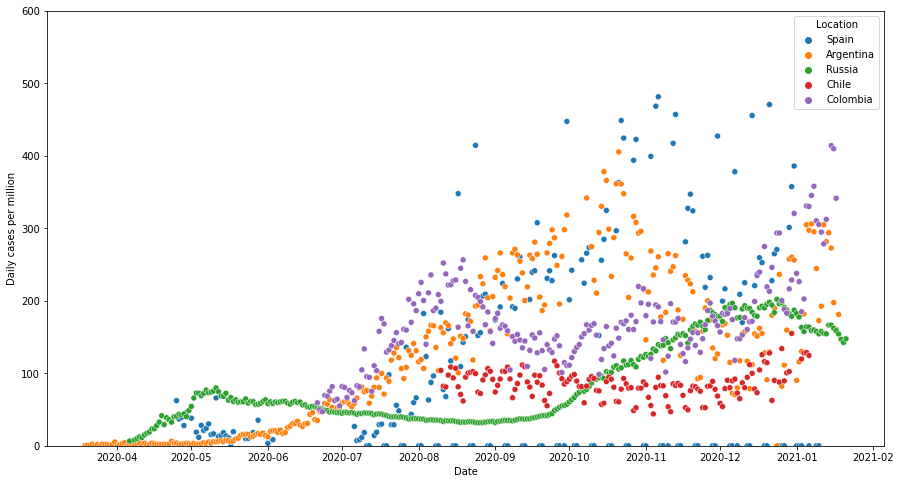

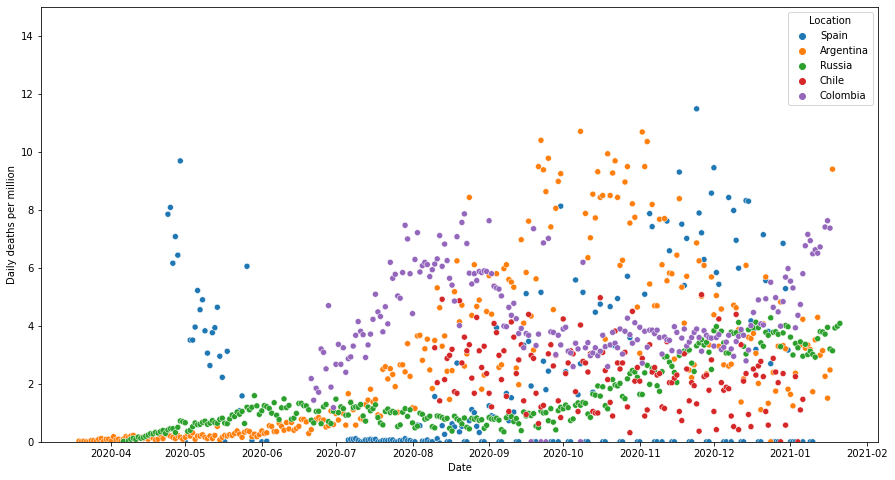

In [53]:
from utils.visualization_tb import daily_deaths_cases, daily_deaths_cases2, daily_deaths_cases3, daily_deaths_cases4
daily_deaths_cases(dt=covid)


(<AxesSubplot:xlabel='Date', ylabel='Daily cases per million'>,
 <AxesSubplot:xlabel='Date', ylabel='Daily deaths per million'>)

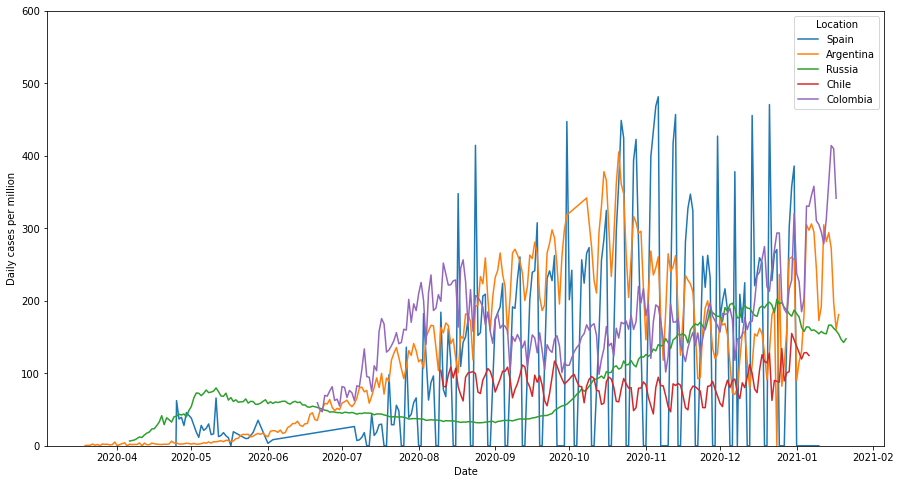

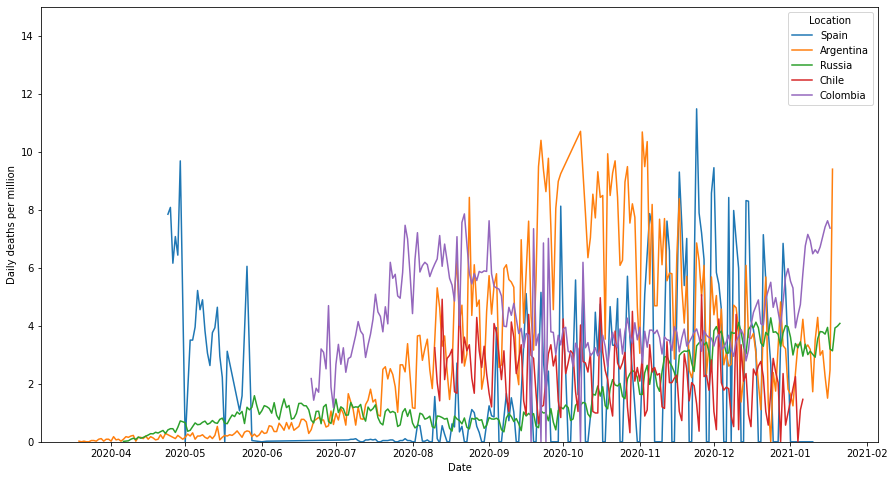

In [54]:
daily_deaths_cases2(dt=covid)

Text(0, 0.5, '')

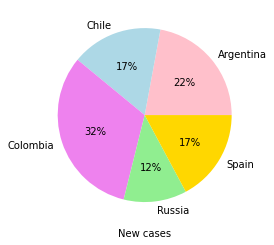

In [36]:
daily_deaths_cases4(dt=covid, col_name="data.new_deaths_per_million", title="Daily deaths")

Text(0, 0.5, '')

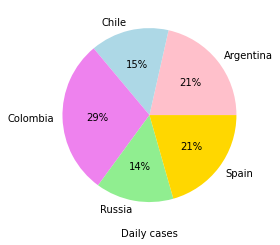

In [56]:
daily_deaths_cases4(dt=covid, col_name="data.new_cases_per_million", title="Daily cases")